In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [3]:
post_list = np.load("Data/ChelseaFCVietnam.npy", allow_pickle=True)
post_df_full = pd.read_csv("Data/ChelseaFCVietnam.csv")

In [ ]:
post_df_full1=post_df_full[:133]
post_df_full1['reactions'] = post_df_full1['reactions'].apply(lambda x : dict(eval(x)) )
post_df_full_reactions = post_df_full1['reactions'].apply(pd.Series )
# Merge expanded columns into dataframe
post_df_full_with_reactions = pd.concat([post_df_full1, post_df_full_reactions], axis=1).drop('reactions', axis=1)
post_df_reactions = post_df_full_with_reactions[['post_text','thích','yêu thích','haha','wow','buồn','phẫn nộ','thương thương',
                                 'shares','comments','reaction_count']]


/tmp/ipykernel_4424/3393039102.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_df_full1['reactions'] = post_df_full1['reactions'].apply(lambda x : dict(eval(x)) )


In [ ]:
post_list[5]['comments']

40

## Thong ke so comment trong moi bai viet

In [ ]:
post_comments_count = post_df_full1[['time', 'comments']]
post_comments_count

time  comments
0    2023-11-18 19:25:39         5
1    2023-11-18 15:53:21         9
2    2023-11-18 15:30:05         0
3    2023-11-18 14:00:57         2
4    2023-11-18 08:48:20        12
..                   ...       ...
128  2023-11-04 14:01:00         0
129  2023-11-04 12:15:44        15
130  2023-11-04 09:08:12        56
131  2023-11-03 21:39:54       130
132  2023-11-03 20:01:20        18

[133 rows x 2 columns]

Text(0.5, 1.0, 'Number of comments per day')

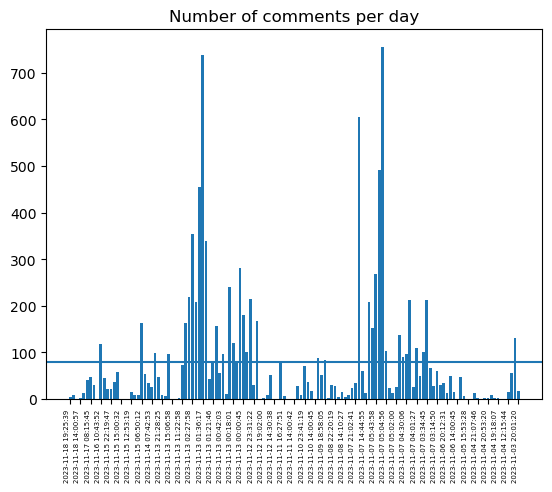

In [ ]:
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rc('xtick', labelsize=5) # thay doi font chu cua cac nhan truc x
plt.bar(post_comments_count['time'], post_comments_count['comments'])
plt.axhline(y=np.nanmean(post_comments_count["comments"]))
#plt.xticks(np.arange(len(post_comments_count)),rotation=45, ha='right')
plt.xticks(np.arange(0, len(post_comments_count) + 1,3), rotation=90, ha='right')
plt.title("Number of comments per day")

In [ ]:
post_df_full_with_reactions.head(3)

Unnamed: 0          post_id  \
0           0  648244647506950   
1           1  648163164181765   
2           2  648154404182641   

                                                text  \
0  “Đập tay cái đã chị uii” 🙄\n\nNgày ra mắt đội ...   
1  Chúc mừng sinh nhật lần thứ 26 của Robert Sanc...   
2  [20H30 hôm nay] CHELSEA WOMEN - LIVERPOOL WOME...   

                                           post_text shared_text  \
0  “Đập tay cái đã chị uii” 🙄\n\nNgày ra mắt đội ...         NaN   
1  Chúc mừng sinh nhật lần thứ 26 của Robert Sanc...         NaN   
2  [20H30 hôm nay] CHELSEA WOMEN - LIVERPOOL WOME...         NaN   

   original_text                 time   timestamp  \
0            NaN  2023-11-18 19:25:39  1700310339   
1            NaN  2023-11-18 15:53:21  1700297601   
2            NaN  2023-11-18 15:30:05  1700296205   

                                               image  \
0                                                NaN   
1  https://scontent.fhan5-6.fna.fbcdn.net/v/t39.3...   
2  https://scontent.fhan5-8.fna.fbcdn.net/v/t39.3...   

                                    image_lowquality  ...  \
0  https://scontent.fhan5-11.fna.fbcdn.net/v/t15....  ...   
1  https://scontent.fhan5-6.fna.fbcdn.net/v/t39.3...  ...   
2  https://scontent.fhan5-8.fna.fbcdn.net/v/t39.3...  ...   

             image_ids was_live             fetched_time  thích yêu thích  \
0                   []    False  2023-11-18 20:37:14.931  298.0      13.0   
1  ['648163147515100']    False  2023-11-18 20:37:18.360  676.0      83.0   
2  ['648154380849310']    False  2023-11-18 20:37:22.500   17.0       1.0   

    haha  wow  thương thương  buồn  phẫn nộ  
0  128.0  1.0            NaN   NaN      NaN  
1    NaN  1.0            6.0   NaN      NaN  
2    NaN  NaN            NaN   NaN      NaN  

[3 rows x 58 columns]

In [ ]:
post_df_reactions = post_df_reactions.fillna(0)

In [ ]:
post_df_reactions

post_text   thích  yêu thích  \
0    “Đập tay cái đã chị uii” 🙄\n\nNgày ra mắt đội ...   298.0       13.0   
1    Chúc mừng sinh nhật lần thứ 26 của Robert Sanc...   676.0       83.0   
2    [20H30 hôm nay] CHELSEA WOMEN - LIVERPOOL WOME...    17.0        1.0   
3    Chúc mừng sinh nhật lần thứ 61 của cựu cầu thủ...    35.0        4.0   
4    "A dream comes true"\n\nChúc mừng Cole Palmer ...   844.0       59.0   
..                                                 ...     ...        ...   
128  Chúc mừng sinh nhật lần thứ 70 của cựu cầu thủ...    29.0        0.0   
129  Với 89% lượt bình chọn từ các cổ động viên trê...  1000.0      112.0   
130  Phóng viên: “Cậu có điều ước đặc biệt gì trong...  2121.0      400.0   
131  Enzo Fernandez: “Khi tôi nghe tin Chelsea đang...  1820.0       44.0   
132  🌟 MỞ BÁN ĐỒ LƯU NIỆM SAU GALA CFCVN16 🌟\n\nKết...   101.0       14.0   

      haha  wow  buồn  phẫn nộ  thương thương  shares  comments  \
0    128.0  1.0   0.0      0.0            0.0       0         5   
1      0.0  1.0   0.0      0.0            6.0       6         9   
2      0.0  0.0   0.0      0.0            0.0       0         0   
3      0.0  0.0   0.0      0.0            0.0       0         2   
4      0.0  0.0   0.0      0.0            3.0       1        12   
..     ...  ...   ...      ...            ...     ...       ...   
128    0.0  0.0   0.0      0.0            0.0       0         0   
129   15.0  0.0   0.0      0.0            8.0       0        15   
130   38.0  2.0   0.0      0.0           21.0       2        56   
131  552.0  3.0   0.0      0.0            5.0       4       130   
132    0.0  0.0   0.0      0.0            0.0       6        18   

     reaction_count  
0               440  
1               766  
2                18  
3                39  
4               906  
..              ...  
128              29  
129            1135  
130            2582  
131            2424  
132             115  

[133 rows x 11 columns]

### Phan tich comments

In [4]:
post_list = post_list.tolist()
print(post_list)

[{'post_id': '648244647506950', 'text': "“Đập tay cái đã chị uii” 🙄\n\nNgày ra mắt đội tuyển quốc gia 'đáng nhớ' của Cole Palmer 😂", 'post_text': "“Đập tay cái đã chị uii” 🙄\n\nNgày ra mắt đội tuyển quốc gia 'đáng nhớ' của Cole Palmer 😂", 'shared_text': '', 'original_text': None, 'time': datetime.datetime(2023, 11, 18, 19, 25, 39), 'timestamp': 1700310339, 'image': None, 'image_lowquality': 'https://scontent.fhan5-11.fna.fbcdn.net/v/t15.5256-10/364790419_984384629291828_3503955391230597734_n.jpg?stp=cp0_dst-jpg_e15_q65_s320x320&_nc_cat=100&ccb=1-7&_nc_sid=f3b36a&efg=eyJpIjoidCJ9&_nc_ohc=cHAmQdMGOQkAX_bmdFa&_nc_ht=scontent.fhan5-11.fna&oh=00_AfAQVfQhp8ideCXRyMNnsZq-bmnpYl358AkJ9ME0RTAVpg&oe=655CCDEE', 'images': [], 'images_description': [], 'images_lowquality': ['https://scontent.fhan5-11.fna.fbcdn.net/v/t15.5256-10/364790419_984384629291828_3503955391230597734_n.jpg?stp=cp0_dst-jpg_e15_q65_s320x320&_nc_cat=100&ccb=1-7&_nc_sid=f3b36a&efg=eyJpIjoidCJ9&_nc_ohc=cHAmQdMGOQkAX_bmdFa&_nc_ht=s

In [19]:
all_comments = []
# Loop through each post in post_list
for post in post_list:
    # Check if 'comments_full' exists and is not empty
    if 'comments_full' in post and len(post['comments_full']) > 0:
        # Extend the list of comments with the comments from the current post
        all_comments.extend(post['comments_full'])
all_comments

[{'comment_id': '797597649042773',
  'comment_url': 'https://facebook.com/797597649042773',
  'commenter_id': '100094145080407',
  'commenter_url': 'https://facebook.com/profile.php?id=100094145080407&eav=Afah2PxL9ZJRRoAEhStz4VWbsFwtI7YTaQ-qzSXtRRD3KCeUOCOusyJWKHmpOpW0jyo&fref=nf&rc=p&refid=52&__tn__=R&paipv=0',
  'commenter_name': 'Hikari Pochama',
  'commenter_meta': None,
  'comment_text': 'HAPPY BIRTHDAY',
  'comment_time': datetime.datetime(2023, 11, 4, 0, 0),
  'comment_image': None,
  'comment_reactors': [],
  'comment_reactions': None,
  'comment_reaction_count': None,
  'replies': []},
 {'comment_id': '3535649086701574',
  'comment_url': 'https://facebook.com/3535649086701574',
  'commenter_id': '100005809965706',
  'commenter_url': 'https://facebook.com/profile.php?id=100005809965706&eav=AfaI6HGq01FBHGX8__VlQN9ZArglBdjcThcQaTwUjrEhf_jcinVzaK0fRiO1EUWxPJw&fref=nf&rc=p&refid=52&__tn__=R&paipv=0',
  'commenter_name': 'Al Ameen Abu Khadijat',
  'commenter_meta': None,
  'comment_

In [23]:
comments_text = []
for comment in all_comments:
    comments_text.append(comment["comment_text"])
len(comments_text)


630

In [15]:
res = []
for post in post_list:
    if len(post['comments_full']) > 0:
        print(post['comments_full'])
        cmt = '\n'.join([comment['comment_text'] for comment in post['comments_full']])
        res.append(cmt)
print(len(res))
print(res)

[{'comment_id': '797597649042773', 'comment_url': 'https://facebook.com/797597649042773', 'commenter_id': '100094145080407', 'commenter_url': 'https://facebook.com/profile.php?id=100094145080407&eav=Afah2PxL9ZJRRoAEhStz4VWbsFwtI7YTaQ-qzSXtRRD3KCeUOCOusyJWKHmpOpW0jyo&fref=nf&rc=p&refid=52&__tn__=R&paipv=0', 'commenter_name': 'Hikari Pochama', 'commenter_meta': None, 'comment_text': 'HAPPY BIRTHDAY', 'comment_time': datetime.datetime(2023, 11, 4, 0, 0), 'comment_image': None, 'comment_reactors': [], 'comment_reactions': None, 'comment_reaction_count': None, 'replies': []}]
[{'comment_id': '3535649086701574', 'comment_url': 'https://facebook.com/3535649086701574', 'commenter_id': '100005809965706', 'commenter_url': 'https://facebook.com/profile.php?id=100005809965706&eav=AfaI6HGq01FBHGX8__VlQN9ZArglBdjcThcQaTwUjrEhf_jcinVzaK0fRiO1EUWxPJw&fref=nf&rc=p&refid=52&__tn__=R&paipv=0', 'commenter_name': 'Al Ameen Abu Khadijat', 'commenter_meta': None, 'comment_text': 'welcome back', 'comment_time

In [ ]:
res[1]

'welcome back\nNhờn Nguyễn Quốc Khánh'

### Keyword thong ke trong thoi gian gan day

In [6]:
text = ""
for i in res:
    text = text + i + " . "
text

'HAPPY BIRTHDAY . welcome back\nNhờn Nguyễn Quốc Khánh . Full đội hình ra sân cho anh em. . True leader indeed\nHe\'ll be a great coach one day.\nI luv this guy\nNice\nElder thiago . Không tính cụ Silva thì là trẻ nhất :v . Chú em được lắm :))) chú biết tay với a . London is Blue\nForever Blues 😍😘\n💙💙💙 . Highlights Chelsea 2-0 Real Madrid (ngày 23/11/2022, UEFA Women\'s Champions League mùa 2022-23): https://\nwww.youtube.com/\nwatch?v=WyW8UXWE\nWek\nHighlights Real Madrid 1-1 Chelsea (ngày 08/12/2022, UEFA Women\'s Champions League mùa 2022-23): https://\nwww.youtube.com/\nwatch?v=axSJlhMY\newY . perfect\nSon of Bridge 👍👍\nIu 🫶🏻💙 . Sớm ra mắt nhm nhé ku em 👍\nÔng em mau khoẻ cứu hàng công chè đi 🥰\n💙 . My boys💪💪 . Dang bay thì lại chấn thương\n🙏🙏🙏🙏 . Ae xuống đất đi. Đường còn dài lắm . Anh Tran Hoang Vu có tương lai ở Chelsea đấy em 😄\nko thở đưlợc luằn\nCó bản lĩnh ko phải đùa.Hvl chọn nó đá pen là chính xác.\nChuẩn bị ăn mừng mà chợt nhớ ra là đội bóng cũ nên thui\nPhan Anh Tâm\nzz

In [ ]:
text_fix = text
print(len(text))
text

15067


'HAPPY BIRTHDAY . welcome back\nNhờn Nguyễn Quốc Khánh . Full đội hình ra sân cho anh em. . True leader indeed\nHe\'ll be a great coach one day.\nI luv this guy\nNice\nElder thiago . Không tính cụ Silva thì là trẻ nhất :v . Chú em được lắm :))) chú biết tay với a . London is Blue\nForever Blues 😍😘\n💙💙💙 . Highlights Chelsea 2-0 Real Madrid (ngày 23/11/2022, UEFA Women\'s Champions League mùa 2022-23): https://\nwww.youtube.com/\nwatch?v=WyW8UXWE\nWek\nHighlights Real Madrid 1-1 Chelsea (ngày 08/12/2022, UEFA Women\'s Champions League mùa 2022-23): https://\nwww.youtube.com/\nwatch?v=axSJlhMY\newY . perfect\nSon of Bridge 👍👍\nIu 🫶🏻💙 . Sớm ra mắt nhm nhé ku em 👍\nÔng em mau khoẻ cứu hàng công chè đi 🥰\n💙 . My boys💪💪 . Dang bay thì lại chấn thương\n🙏🙏🙏🙏 . Ae xuống đất đi. Đường còn dài lắm . Anh Tran Hoang Vu có tương lai ở Chelsea đấy em 😄\nko thở đưlợc luằn\nCó bản lĩnh ko phải đùa.Hvl chọn nó đá pen là chính xác.\nChuẩn bị ăn mừng mà chợt nhớ ra là đội bóng cũ nên thui\nPhan Anh Tâm\nzz

In [ ]:
text_fix = str(text)
print(len(text_fix))
text_fix

15067


'HAPPY BIRTHDAY . welcome back\nNhờn Nguyễn Quốc Khánh . Full đội hình ra sân cho anh em. . True leader indeed\nHe\'ll be a great coach one day.\nI luv this guy\nNice\nElder thiago . Không tính cụ Silva thì là trẻ nhất :v . Chú em được lắm :))) chú biết tay với a . London is Blue\nForever Blues 😍😘\n💙💙💙 . Highlights Chelsea 2-0 Real Madrid (ngày 23/11/2022, UEFA Women\'s Champions League mùa 2022-23): https://\nwww.youtube.com/\nwatch?v=WyW8UXWE\nWek\nHighlights Real Madrid 1-1 Chelsea (ngày 08/12/2022, UEFA Women\'s Champions League mùa 2022-23): https://\nwww.youtube.com/\nwatch?v=axSJlhMY\newY . perfect\nSon of Bridge 👍👍\nIu 🫶🏻💙 . Sớm ra mắt nhm nhé ku em 👍\nÔng em mau khoẻ cứu hàng công chè đi 🥰\n💙 . My boys💪💪 . Dang bay thì lại chấn thương\n🙏🙏🙏🙏 . Ae xuống đất đi. Đường còn dài lắm . Anh Tran Hoang Vu có tương lai ở Chelsea đấy em 😄\nko thở đưlợc luằn\nCó bản lĩnh ko phải đùa.Hvl chọn nó đá pen là chính xác.\nChuẩn bị ăn mừng mà chợt nhớ ra là đội bóng cũ nên thui\nPhan Anh Tâm\nzz

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import tokenize
import math
from operator import itemgetter
stop_words = ['đã không', 'gần hết', 'tỏ ra', 'nói nhỏ', 'thúng thắng', 'từ loại', 'bao nhiêu', 'ăn làm', 'phỉ phui', 'chứ như', 'vung thiên địa', 'sang sáng', 'tại đâu', 'ông từ', 'giữa lúc', 'giờ đây', 'câu hỏi', 'không điều kiện', 'khẳng định', 'chốc chốc', 'lấy ra', 'nước xuống', 'nói là', 'sau đó', 'là phải', 'về không', 'dành dành', 'làm tăng', 'có tháng', 'tất cả bao nhiêu', 'nhìn theo', 'ơ kìa', 'cho được', 'ầu ơ', 'trong này', 'ối giời', 'tránh khỏi', 'ứ hự', 'chẳng nữa', 'cần số', 'phải rồi', 'đã thế', 'khó chơi', 'ờ ờ', 'sẽ hay', 'đưa chuyện', 'lượng số', 'cơ cùng', 'cho rằng', 'lúc này', 'quan trọng', 'ăn chung', 'vài điều', 'đang tay', 'lòng không', 'tới nơi', 'chết thật', 'cha chả', 'tăng cấp', 'ý chừng', 'đưa em', 'căn tính', 'chắc người', 'này nọ', 'rén bước', 'mỗi lúc', 'căn cắt', 'bất kể', 'ai nấy', 'ba ngày', 'bất quá', 'ráo cả', 'chu cha', 'bằng nào', 'đủ nơi', 'thực vậy', 'tại nơi', 'tha hồ', 'ăn hỏi', 'sử dụng', 'cảm ơn', 'ào vào', 'duy chỉ', 'đâu đây', 'ngộ nhỡ', 'vài nơi', 'biết mình', 'thường tại', 'trong mình', 'ô kìa', 'trước đây', 'vừa lúc', 'đâu cũng', 'thời điểm', 'từng ấy', 'ở được', 'cùng cực', 'khó nghĩ', 'vùng nước', 'quá tuổi', 'cật sức', 'thiếu điểm', 'dạ khách', 'chắc ăn', 'lần khác', 'tột cùng', 'tuần tự', 'những là', 'tự ý', 'bởi thế', 'thục mạng', 'trước ngày', 'tuốt tuồn tuột', 'trong ngoài', 'hiện nay', 'dù cho', 'thuộc bài', 'nữa khi', 'chịu chưa', 'không hay', 'thật sự', 'thà rằng', 'đặt mức', 'thậm từ', 'nhằm vào', 'dù sao', 'như không', 'bấy lâu nay', 'tuyệt nhiên', 'ngày đến', 'thích ý', 'thế sự', 'nghe chừng', 'đúng ngày', 'bộ thuộc', 'để giống', 'chưa dễ', 'ông nhỏ', 'thấy tháng', 'ba họ', 'vì chưng', 'càng hay', 'lấy có', 'tự lượng', 'thích tự', 'cơ mà', 'thật ra', 'thích cứ', 'ra ngôi', 'chuyển tự', 'ở đây', 'xon xón', 'dẫu rằng', 'ra tay', 'thường thôi', 'vì rằng', 'bất kì', 'xin gặp', 'thuần ái', 'lúc đi', 'đủ số', 'dễ thấy', 'nhờ đó', 'hơn là', 'thoạt nghe', 'ví phỏng', 'mà lại', 'nhanh lên', 'người khách', 'quả là', 'chưa dùng', 'cứ điểm', 'mỗi lần', 'lượng từ', 'nói riêng', 'khác nào', 'trời đất ơi', 'vị tất', 'bỏ mình', 'nói khó', 'quá mức', 'vèo vèo', 'từ tại', 'cuối cùng', 'phải cách', 'nhận nhau', 'ngày này', 'đáng lý', 'trước khi', 'sở dĩ', 'do vì', 'thường tính', 'đúng với', 'chung cho', 'mà không', 'phải biết', 'ái chà', 'hết nói', 'đâu đâu', 'chành chạnh', 'bỗng nhiên', 'có chăng là', 'ba tăng', 'trừ phi', 'ông tạo', 'như quả', 'nhất nhất', 'đưa tay', 'ngôi thứ', 'về phần', 'trệu trạo', 'sang năm', 'tấm bản', 'để phần', 'bỏ lại', 'từ đó', 'vừa mới', 'sì sì', 'thậm cấp', 'buổi sớm', 'bỏ mất', 'hay hay', 'gây giống', 'hay tin', 'nơi nơi', 'tại đây', 'hết của', 'dễ gì', 'tính cách', 'vâng vâng', 'chùn chũn', 'con nhà', 'gặp khó khăn', 'đều nhau', 'đại loại', 'nếu như', 'một khi', 'trong số', 'qua ngày', 'không ai', 'nói lại', 'riêng từng', 'nghĩ xa', 'lời nói', 'chứ không phải', 'lần tìm', 'trước tiên', 'cả người', 'trong vùng', 'tới gần', 'quả thế', 'thường khi', 'ông ấy', 'tháng ngày', 'xa xả', 'dễ dùng', 'ví bằng', 'chung quy', 'lấy làm', 'thấp thỏm', 'cây nước', 'cô ấy', 'đặc biệt', 'nào là', 'vào khoảng', 'kể như', 'tạo ra', 'dầu sao', 'về nước', 'nhón nhén', 'thích thuộc', 'sáng rõ', 'lại nữa', 'thực hiện', 'chưa từng', 'bấy nay', 'cấp số', 'đặt làm', 'nhớ ra', 'vung tàn tán', 'tắp lự', 'chung cuộc', 'từ khi', 'tuy có', 'có thể', 'như thế nào', 'ối dào', 'dễ như chơi', 'lên nước', 'lấy thế', 'lên số', 'cho tới', 'chứ còn', 'trả của', 'đến thế', 'gì gì', 'trước nay', 'thảo hèn', 'lúc đó', 'nhận việc', 'mang mang', 'không những', 'nào phải', 'trước đó', 'lớn nhỏ', 'thì thôi', 'tuổi cả', 'ra ý', 'quá tin', 'tuy rằng', 'dễ ngươi', 'con dạ', 'để không', 'cứ như', 'bên cạnh', 'tò te', 'chịu tốt', 'không kể', 'nức nở', 'lấy được', 'bỏ xa', 'lấy giống', 'tự tính', 'đến khi', 'vừa rồi', 'chết tiệt', 'sau cùng', 'cao thế', 'sao đang', 'qua chuyện', 'chỉ là', 'cả ăn', 'ba bản', 'ngồi bệt', 'làm dần dần', 'mang nặng', 'rồi đây', 'ăn sáng', 'cả nghĩ', 'cho đến khi', 'tình trạng', 'phần nào', 'tanh tanh', 'không gì', 'đưa cho', 'gì đó', 'sao bằng', 'ra gì', 'bước tới', 'tiếp tục', 'lấy cả', 'chung cục', 'xem ra', 'vậy mà', 'nhằm khi', 'trả ngay', 'có người', 'lên cao', 'phần việc', 'thuộc lại', 'hết cả', 'bất thình lình', 'trực tiếp', 'ấy là', 'ngay lập tức', 'ở vào', 'ai đó', 'cùng tuổi', 'dù rằng', 'vốn dĩ', 'bởi ai', 'thốt nhiên', 'từng phần', 'bằng người', 'số người', 'lại người', 'vài nhà', 'nhờ có', 'khi trước', 'hay sao', 'nữa rồi', 'bấy lâu', 'đồng thời', 'dở chừng', 'đánh giá', 'tìm bạn', 'tên họ', 'mất còn', 'khác nhau', 'dẫu mà', 'ngồi sau', 'chỉ tên', 'ngồi trệt', 'lên ngôi', 'dùng hết', 'vào đến', 'cũng vậy thôi', 'nước ăn', 'cho nên', 'phía bên', 'ăn cuộc', 'nói lên', 'biết đâu đấy', 'đáo để', 'giờ đến', 'đang thì', 'liên quan', 'nhiên hậu', 'nếu có', 'tha hồ chơi', 'ngõ hầu', 'từng nhà', 'lần sang', 'chú dẫn', 'đủ dùng', 'chắc hẳn', 'được lời', 'văng tê', 'ái dà', 'chớ không', 'chính điểm', 'dễ sợ', 'chao ôi', 'khi nên', 'bằng ấy', 'như chơi', 'ôi chao', 'họ xa', 'cật lực', 'cụ thể là', 'phải lời', 'chăng nữa', 'đầy năm', 'có số', 'ơi là', 'lúc khác', 'nghe không', 'con tính', 'đầu tiên', 'sáng thế', 'thốc tháo', 'thế ra', 'vậy thì', 'còn về', 'ngay cả', 'hết ý', 'xuất hiện', 'chưa chắc', 'mọi giờ', 'nhất mực', 'sao bản', 'sắp đặt', 'làm lòng', 'ăn ngồi', 'vậy ư', 'chứ gì', 'xử lý', 'vừa khi', 'nhất luật', 'trên bộ', 'bấy chầy', 'lại quả', 'tà tà', 'cơ hồ', 'nhỏ người', 'làm nên', 'bây bẩy', 'nếu vậy', 'người khác', 'tiếp đó', 'phía dưới', 'biết đâu chừng', 'dạ dài', 'còn nữa', 'có cơ', 'tôi con', 'quá lời', 'cách đều', 'để đến nỗi', 'thế nên', 'xa xa', 'hoàn toàn', 'mở mang', 'nhất tâm', 'vài người', 'phải khi', 'vô luận', 'thời gian tính', 'sáng ý', 'thanh không', 'một lúc', 'nói phải', 'chuyển đạt', 'đầy tuổi', 'tay quay', 'chung quy lại', 'chắc chắn', 'bao giờ', 'từ căn', 'thái quá', 'lấy vào', 'chứ lị', 'biết việc', 'giữ lấy', 'đưa tới', 'tiện thể', 'khi nào', 'như vậy', 'vừa qua', 'veo veo', 'cho biết', 'ngôi nhà', 'những ai', 'nên tránh', 'đã đủ', 'tuy vậy', 'nhất thiết', 'ăn chắc', 'không có gì', 'biết bao nhiêu', 'đều bước', 'giờ lâu', 'bỏ việc', 'đại phàm', 'lại ăn', 'qua đi', 'hoặc là', 'ngay bây giờ', 'làm thế nào', 'nhất định', 'nghe thấy', 'trước tuổi', 'mà vẫn', 'tăm tắp', 'về tay', 'ạ ơi', 'nhận được', 'phía trước', 'chỉ có', 'tránh ra', 'ra người', 'không đầy', 'nghe hiểu', 'phía trên', 'lần lần', 'tỏ vẻ', 'ba ngôi', 'phía bạn', 'trong khi', 'thì ra', 'đây này', 'bỏ riêng', 'lúc lâu', 'bản ý', 'bấy giờ', 'nghe được', 'khác khác', 'cùng tột', 'coi bộ', 'bán thế', 'ô hay', 'tên tự', 'qua khỏi', 'đã vậy', 'chính bản', 'ít nhiều', 'đưa xuống', 'bỗng chốc', 'quay lại', 'không bao lâu', 'không cùng', 'nào đó', 'vẫn thế', 'hay nói', 'còn như', 'dễ thường', 'ngày xửa', 'vâng ý', 'dùng đến', 'mọi khi', 'nhờ chuyển', 'ngay tức thì', 'khó thấy', 'ngay khi đến', 'nhận biết', 'ngay từ', 'ra đây', 'chưa có', 'cái đã', 'một cách', 'của ngọt', 'do vậy', 'đánh đùng', 'quan tâm', 'lên cơn', 'bất đồ', 'bỏ không', 'ráo trọi', 'làm lấy', 'đưa vào', 'sốt sột', 'mọi thứ', 'hay nhỉ', 'khó khăn', 'ồ ồ', 'sự thế', 'lấy xuống', 'ra chơi', 'cho tới khi', 'hầu hết', 'nói rõ', 'xuất kì bất ý', 'nhà làm', 'nhận ra', 'đưa ra', 'nữa là', 'nếu cần', 'thời gian', 'thế thôi', 'đâu phải', 'qua tay', 'đâu đó', 'oai oái', 'tại đó', 'mới hay', 'nhà ngươi', 'lúc đến', 'không thể', 'nhìn nhận', 'thật vậy', 'trong lúc', 'biết đâu', 'công nhiên', 'tuy thế', 'phải lại', 'vị trí', 'bỗng dưng', 'chưa kể', 'số loại', 'tránh tình trạng', 'của tin', 'họ gần', 'xin vâng', 'thế thế', 'đây đó', 'nhận làm', 'tập trung', 'nhớ bập bõm', 'chăn chắn', 'người nhận', 'nước lên', 'không phải không', 'dẫu sao', 'chung ái', 'tức thì', 'cụ thể như', 'bài bác', 'giống như', 'suýt nữa', 'từ ái', 'đặt ra', 'phỏng như', 'có đáng', 'nhận thấy', 'trả trước', 'hơn trước', 'tìm việc', 'mỗi một', 'nếu được', 'ở như', 'chứ không', 'những như', 'chí chết', 'bỏ nhỏ', 'chưa bao giờ', 'giống người', 'hết chuyện', 'dùng làm', 'ứ ừ', 'cùng ăn', 'nhất loạt', 'xa tắp', 'luôn cả', 'lần theo', 'không cần', 'lấy ráo', 'đến lời', 'phải cái', 'tha hồ ăn', 'sự việc', 'thực sự', 'điểm gặp', 'bỗng không', 'nhìn chung', 'làm được', 'ngày càng', 'không bán', 'điều gì', 'ít hơn', 'tính người', 'cuối điểm', 'dạ bán', 'chắc lòng', 'vào vùng', 'tuốt tuột', 'dễ khiến', 'đến thì', 'tiếp theo', 'ngăn ngắt', 'để lại', 'vâng dạ', 'cũng như', 'đã là', 'bất ngờ', 'hãy còn', 'nói ra', 'giảm thấp', 'nói thêm', 'ví thử', 'ít ra', 'chắc vào', 'nước cùng', 'bây chừ', 'chứ sao', 'bài cái', 'ừ ào', 'thuộc từ', 'từng cái', 'trước kia', 'anh ấy', 'ăn chịu', 'tự khi', 'những muốn', 'ngày qua', 'nhiệt liệt', 'à ơi', 'bằng không', 'nghĩ tới', 'có ngày', 'tìm hiểu', 'khó biết', 'bất chợt', 'người hỏi', 'toé khói', 'làm ngay', 'giờ này', 'thương ôi', 'vì vậy', 'có phải', 'như thể', 'đến cùng cực', 'như thế', 'xiết bao', 'bất tử', 'căn cái', 'xềnh xệch', 'như trước', 'làm sao', 'ít thấy', 'dài ra', 'cao xa', 'có thế', 'sa sả', 'quá trình', 'phải giờ', 'tự cao', 'thường hay', 'nhận họ', 'yêu cầu', 'làm đúng', 'là nhiều', 'vừa vừa', 'nước bài', 'khá tốt', 'đại để', 'tấm các', 'cái họ', 'cô tăng', 'ví dù', 'sáng ngày', 'vào gặp', 'ngày giờ', 'một vài', 'cần cấp', 'như tuồng', 'khác xa', 'dù dì', 'ngày xưa', 'điểm đầu tiên', 'lên mạnh', 'bây nhiêu', 'thường sự', 'có nhiều', 'ô kê', 'kể cả', 'đến nỗi', 'đều đều', 'cứ việc', 'phải chi', 'hay làm', 'khác gì', 'thường xuất hiện', 'bởi thế cho nên', 'ngoài ra', 'ý da', 'thế thì', 'cho đến nỗi', 'biết chắc', 'gây thêm', 'từng giờ', 'vì thế', 'nhìn lại', 'nghe rõ', 'bởi đâu', 'khoảng không', 'vấn đề quan trọng', 'tức tốc', 'tính căn', 'ngày nọ', 'đáng số', 'sẽ biết', 'cơ hội', 'trong đó', 'ắt hẳn', 'thanh điểm', 'nào đâu', 'điểm chính', 'khác thường', 'đưa tin', 'phương chi', 'úi dào', 'quả thật', 'nói xa', 'chung chung', 'vô hình trung', 'ăn người', 'vùng lên', 'nhung nhăng', 'thường bị', 'thuộc cách', 'biết thế', 'bị vì', 'thế lại', 'cơ dẫn', 'nhân dịp', 'bỏ bà', 'lấy lý do', 'lâu ngày', 'phù hợp', 'đáng lí', 'mọi nơi', 'cho nhau', 'có điều kiện', 'bên có', 'chớ như', 'ngày nào', 'nhất quyết', 'phải chăng', 'có nhà', 'đến hay', 'thấp cơ', 'qua lần', 'bộ điều', 'mà cả', 'có chăng', 'cao thấp', 'nói với', 'làm vì', 'giá trị', 'nên người', 'ngoài xa', 'thêm vào', 'lâu các', 'không để', 'thế đó', 'khỏi nói', 'cho chắc', 'cả thảy', 'làm gì', 'buổi mới', 'từ tính', 'nhớ lại', 'một ít', 'bởi vậy', 'giữ ý', 'cùng với', 'trực tiếp làm', 'tới mức', 'hay đâu', 'chúng tôi', 'chú mày', 'nghe như', 'chọn ra', 'âu là', 'bây giờ', 'đến ngày', 'tự vì', 'là cùng', 'nhìn xuống', 'đó đây', 'xăm xăm', 'làm riêng', 'đến nay', 'tăng chúng', 'tháng tháng', 'cái đó', 'ngày ấy', 'lượng cả', 'bao nả', 'có họ', 'mở ra', 'thoạt nhiên', 'xăm xúi', 'lúc nào', 'nói qua', 'đáng lẽ', 'ít nhất', 'vài tên', 'nhỡ ra', 'bập bõm', 'do đó', 'không còn', 'ít có', 'như sau', 'thanh điều kiện', 'hết ráo', 'số là', 'lần nào', 'hay là', 'hỏi lại', 'thường đến', 'tốt mối', 'rõ thật', 'thứ đến', 'bởi nhưng', 'đưa đến', 'ít khi', 'thật thà', 'thực tế', 'quá tay', 'chú mình', 'ừ ừ', 'việc gì', 'không tính', 'bởi tại', 'tạo điều kiện', 'có ai', 'chung nhau', 'tạo ý', 'gần bên', 'làm lại', 'rất lâu', 'bỗng nhưng', 'có vẻ', 'ngày tháng', 'có dễ', 'kể từ', 'nhà việc', 'phần nhiều', 'đến xem', 'sau đây', 'đủ điều', 'nước nặng', 'khó nghe', 'tênh tênh', 'dễ ăn', 'cao số', 'phải người', 'đã lâu', 'a lô', 'có ăn', 'bởi chưng', 'bản riêng', 'không bao giờ', 'vượt khỏi', 'được tin', 'thì phải', 'đúng tuổi', 'từ từ', 'lời chú', 'càng càng', 'nghe đâu như', 'bỗng đâu', 'nói toẹt', 'sau hết', 'để được', 'như trên', 'hay không', 'cô quả', 'luôn tay', 'thật chắc', 'theo tin', 'đơn vị', 'là là', 'quá đáng', 'rõ là', 'nhà tôi', 'ít thôi', 'chú khách', 'ngay thật', 'nói đủ', 'phải tay', 'lại bộ', 'cá nhân', 'tất cả', 'nhanh tay', 'nếu không', 'hơn cả', 'có khi', 'những khi', 'không phải', 'phỏng tính', 'duy có', 'thay đổi tình trạng', 'hỏi xem', 'có chứ', 'lúc trước', 'không ngoài', 'quan trọng vấn đề', 'khó làm', 'ngay lúc này', 'cho hay', 'tên chính', 'phần sau', 'bằng như', 'tông tốc', 'chịu lời', 'lấy lại', 'cách bức', 'số phần', 'lấy số', 'rồi sao', 'ba cùng', 'vả lại', 'cơ chỉ', 'tốt ngày', 'tự tạo', 'rút cục', 'ở năm', 'như ai', 'giá trị thực tế', 'tạo cơ hội', 'mọi việc', 'gây cho', 'bước khỏi', 'thà là', 'cảm thấy', 'rồi ra', 'chứ ai', 'xem lại', 'từng đơn vị', 'chui cha', 'lấy để', 'được cái', 'chầm chập', 'tất thảy', 'thi thoảng', 'với lại', 'chẳng lẽ', 'thỉnh thoảng', 'tù tì', 'lại cái', 'dễ nghe', 'có ý', 'cả tin', 'lại nói', 'thêm chuyện', 'chúng ta', 'ngồi không', 'bỗng thấy', 'phải không', 'thế mà', 'cùng nhau', 'cũng nên', 'phần lớn', 'coi mòi', 'trước nhất', 'dễ đâu', 'đến giờ', 'để lòng', 'cả thể', 'có được', 'ăn quá', 'tuy là', 'từ thế', 'so với', 'chớ gì', 'nhà chung', 'nhớ lấy', 'bội phần', 'đành đạch', 'đến cùng', 'làm cho', 'tuy đã', 'cho tin', 'gặp phải', 'cho đến', 'thực hiện đúng', 'tới thì', 'ăn hết', 'xăm xắm', 'chùn chùn', 'thật lực', 'làm mất', 'chung qui', 'ớ này', 'bay biến', 'bập bà bập bõm', 'tránh xa', 'ở lại', 'song le', 'từ ấy', 'một số', 'tất tật', 'rồi nữa', 'được nước', 'chợt nhìn', 'nhất là', 'cả nhà', 'ngay tức khắc', 'ừ thì', 'ngay lúc', 'lần trước', 'cụ thể', 'có đâu', 'gần đây', 'cực lực', 'sau cuối', 'đến nơi', 'đảm bảo', 'lâu nay', 'từ nay', 'lên xuống', 'rồi thì', 'lớn lên', 'biết bao', 'buổi làm', 'mà thôi', 'mỗi người', 'mọi người', 'tại tôi', 'tất tần tật', 'thế à', 'bởi sao', 'phè phè', 'ngày cấp', 'thế nào', 'là vì', 'lại đây', 'đến cả', 'vô vàn', 'sau này', 'ăn trên', 'quay đi', 'tháng năm', 'chưa tính', 'tốt hơn', 'mới rồi', 'hỏi xin', 'khó tránh', 'tự ăn', 'tốt bạn', 'làm tin', 'thế chuẩn bị', 'chính là', 'cô mình', 'ít biết', 'lần này', 'đặt mình', 'trả lại', 'tại vì', 'quá bán', 'đến đâu', 'như là', 'đúng ra', 'quay số', 'từ điều', 'chợt nghe', 'bấy chừ', 'bước đi', 'còn thời gian', 'cả ngày', 'chọn bên', 'lại thôi', 'dùng cho', 'nhằm lúc', 'người người', 'vậy nên', 'phía sau', 'bất cứ', 'thốt thôi', 'chớ chi', 'mỗi ngày', 'ào ào', 'không được', 'thì giờ', 'gần như', 'ơ hay', 'rồi sau', 'mọi lúc', 'nếu mà', 'xuất kỳ bất ý', 'sang tay', 'tin thêm', 'cơ chừng', 'a ha', 'đối với', 'gây ra', 'cách nhau', 'tuốt luốt', 'vung tán tàn', 'vượt quá', 'tính phỏng', 'từng thời gian', 'luôn luôn', 'chúng ông', 'thế thường', 'nói tốt', 'lại còn', 'ren rén', 'lại làm', 'biết chừng nào', 'bỏ cha', 'cái gì', 'rồi tay', 'xa cách', 'làm bằng', 'ngọn nguồn', 'thanh thanh', 'ối giời ơi', 'quá thì', 'xảy ra', 'sau chót', 'trong ấy', 'tại lòng', 'thanh chuyển', 'trước sau', 'vạn nhất', 'tối ư', 'chỉ chính', 'tựu trung', 'chẳng phải', 'xem số', 'thường thường', 'hay biết', 'nào cũng', 'cho ăn', 'có điều', 'đưa về', 'đặt để', 'với nhau', 'trước hết', 'rằng là', 'thay đổi', 'theo bước', 'tốt bộ', 'bằng vào', 'bán cấp', 'lấy thêm', 'đến bao giờ', 'cao sang', 'riu ríu', 'vào lúc', 'thật tốt', 'khi khác', 'cho về', 'vài ba', 'nghe nhìn', 'thanh tính', 'áng như', 'chơi họ', 'hỗ trợ', 'vâng chịu', 'xa gần', 'bằng nấy', 'chẳng những', 'bởi vì', 'bỏ quá', 'lên đến', 'thứ bản', 'đến lúc', 'ít nữa', 'phải như', 'thì là', 'giảm chính', 'gần đến', 'nên chi', 'nghe tin', 'cao lâu', 'thế là', 'lấy sau', 'gần ngày', 'tìm cách', 'phỏng theo', 'ăn riêng', 'ăn về', 'thành ra', 'đáng kể', 'chăng chắc', 'các cậu', 'thình lình', 'tuy nhiên', 'rồi xem', 'bản thân', 'phía trong', 'bà ấy', 'nên chăng', 'cùng chung', 'nhìn thấy', 'kể tới', 'đến điều', 'dữ cách', 'cần gì', 'sao vậy', 'thật là', 'có chuyện', 'giờ đi', 'bấy nhiêu', 'nói thật', 'xa nhà', 'bắt đầu', 'sao cho', 'chính thị', 'ở trên', 'không nhận', 'nên làm', 'dần dần', 'về sau', 'mang lại', 'lần sau', 'nghĩ ra', 'khoảng cách', 'buổi ngày', 'đây rồi', 'ít quá', 'là thế nào', 'thực ra', 'một cơn', 'nhằm để', 'ngày ngày', 'biết mấy', 'nếu thế', 'nghe đâu', 'làm tôi', 'đặt trước', 'trếu tráo', 'tăng thêm', 'cũng thế', 'làm như', 'phăn phắt', 'than ôi', 'mọi sự', 'nhất sinh', 'chuẩn bị', 'ráo nước', 'tắp tắp', 'dạ con', 'số cụ thể', 'ăn tay', 'ông ổng', 'ra điều', 'nước quả', 'ngay khi', 'năm tháng', 'bất giác', 'nhưng mà', 'dài lời', 'nói ý', 'là ít', 'chị bộ', 'đã hay', 'cũng vậy', 'ở nhờ', 'nghe trực tiếp', 'ngoài này', 'bất quá chỉ', 'làm tại', 'thảo nào', 'em em', 'cho đang', 'quá ư', 'rốt cục', 'nhất đán', 'ra bài', 'trở thành', 'nhất tề', 'răng răng', 'thành thử', 'cổ lai', 'thật quả', 'ắt là', 'loại từ', 'thốt nói', 'xa tanh', 'chứ lại', 'nói chung', 'làm theo', 'nhân tiện', 'không chỉ', 'lại giống', 'không dùng', 'tại sao', 'cả nghe', 'quay bước', 'bất kỳ', 'phỏng nước', 'không biết', 'thiếu gì', 'á à', 'không có', 'xoành xoạch', 'đâu có', 'biết được', 'rốt cuộc', 'qua thì', 'bên bị', 'lúc sáng', 'bắt đầu từ', 'khó nói', 'như ý', 'đâu nào', 'thời gian sử dụng', 'nặng mình', 'nghe nói', 'ra lời', 'chắc dạ', 'quá nhiều', 'sau sau', 'tạo nên', 'chia sẻ', 'thanh ba', 'ngày rày', 'ra vào', 'số cho biết', 'ô hô', 'thêm giờ', 'theo như', 'con con', 'ít lâu', 'điều kiện', 'vậy ra', 'ý hoặc', 'những lúc', 'ở đó', 'như nhau', 'cao răng', 'vậy là', 'chịu ăn', 'bằng nhau', 'rón rén', 'để mà', 'à này', 'sau nữa', 'làm ra', 'tuổi tôi', 'nói đến', 'nói trước', 'bị chú', 'hiện tại', 'úi chà', 'đâu như', 'cách không', 'hết rồi', 'khó mở', 'chết nỗi', 'ừ nhé', 'đến tuổi', 'đại nhân', 'không cứ', 'mở nước', 'ra sao', 'lý do', 'thôi việc', 'quá bộ', 'bán dạ', 'nhược bằng', 'chị ấy', 'bất nhược', 'trên dưới', 'chính giữa', 'cũng được', 'để cho', 'thậm chí', 'cái ấy', 'ắt phải', 'bỏ mẹ', 'dần dà', 'khi không', 'nhiều ít', 'nước đến', 'số thiếu', 'tít mù', 'cả năm', 'chưa cần', 'vì sao', 'tăng thế', 'nghĩ đến', 'tìm ra', 'quả vậy', 'qua lại', 'biết trước', 'đầy phè', 'ra lại', 'nghiễm nhiên', 'dạ dạ', 'ba ba', 'giống nhau', 'tên cái', 'bỏ cuộc', 'đủ điểm', 'ôi thôi', 'dưới nước', 'nhất thì', 'tấn tới', 'lâu lâu', 'thấp xuống', 'như thường', 'nói bông', 'chớ kể', 'giảm thế', 'bất luận', 'nghe lại', 'quá giờ', 'làm tắp lự', 'bằng được', 'nào hay', 'cấp trực tiếp', 'bao lâu', 'vả chăng', 'từ giờ', 'nghe ra', 'tin vào', 'bỏ ra', 'bài bỏ', 'nhờ nhờ', 'mang về', 'nặng căn', 'tính từ', 'hơn nữa', 'ai ai', 'dễ sử dụng', 'mới đây', 'vấn đề', 'chúng mình', 'gần xa', 'vô kể', 'nặng về', 'ra bộ', 'tốc tả', 'tăng giảm', 'không khỏi', 'người mình', 'thường số', 'cao ráo', 'nghĩ lại', 'cu cậu', 'bản bộ', 'sớm ngày', 'ắt thật', 'cho thấy', 'bằng cứ', 'hơn hết', 'lúc ấy', 'cho rồi', 'cóc khô', 'nhà ngoài', 'đến gần', 'nhà khó']

print(stop_words)

['đã không', 'gần hết', 'tỏ ra', 'nói nhỏ', 'thúng thắng', 'từ loại', 'bao nhiêu', 'ăn làm', 'phỉ phui', 'chứ như', 'vung thiên địa', 'sang sáng', 'tại đâu', 'ông từ', 'giữa lúc', 'giờ đây', 'câu hỏi', 'không điều kiện', 'khẳng định', 'chốc chốc', 'lấy ra', 'nước xuống', 'nói là', 'sau đó', 'là phải', 'về không', 'dành dành', 'làm tăng', 'có tháng', 'tất cả bao nhiêu', 'nhìn theo', 'ơ kìa', 'cho được', 'ầu ơ', 'trong này', 'ối giời', 'tránh khỏi', 'ứ hự', 'chẳng nữa', 'cần số', 'phải rồi', 'đã thế', 'khó chơi', 'ờ ờ', 'sẽ hay', 'đưa chuyện', 'lượng số', 'cơ cùng', 'cho rằng', 'lúc này', 'quan trọng', 'ăn chung', 'vài điều', 'đang tay', 'lòng không', 'tới nơi', 'chết thật', 'cha chả', 'tăng cấp', 'ý chừng', 'đưa em', 'căn tính', 'chắc người', 'này nọ', 'rén bước', 'mỗi lúc', 'căn cắt', 'bất kể', 'ai nấy', 'ba ngày', 'bất quá', 'ráo cả', 'chu cha', 'bằng nào', 'đủ nơi', 'thực vậy', 'tại nơi', 'tha hồ', 'ăn hỏi', 'sử dụng', 'cảm ơn', 'ào vào', 'duy chỉ', 'đâu đây', 'ngộ nhỡ', 'vài nơi', '

In [ ]:
stop_words1={'nhưng', 'trả', 'nhóm', 'vậy', 'liên_kết', 'thẩy', 'cấp', 'vừa', 'ơ', 'trước', 'mọi', 'nhận', 'lời', 'và', 'amen', 'chậc', 'cách', 'trên', 'bài', 'ngôi', 'trệt', 'nói', 'hai', 'buổi', 'thấp', 'loài', 'tạo', 'thốc', 'vụt', 'không', 'thường', 'chính', 'cùng', 'điểm', 'bệt', 'nếu', 'ái', 'oái', 'bản', 'giảm', 'bển', 'giữa', 'bông', 'sắp', 'giờ', 'ngay', 'cái', 'khó', 'thế', 'bỗng', 'tránh', 'rõ', 'thuần', 'phía', 'bên', 'hoa', 'chú', 'tới', 'bước', 'bà', 'chỉ', 'ờ', 'chung', 'nghĩ', 'tỉnh', 'tin', 'rằng', 'ngày', 'căn', 'gần', 'ngoải', 'sáng', 'nóc', 'mối', 'được', 'càng', 'rồi', 'chị', 'cuộc', 'nặng', 'con', 'sang', 'bức', 'nguồn', 'giữ', 'loại', 'điều', 'nhất', 'phót', 'bớ', 'thoắt', 'ngoài', 'cần', 'từng', 'lúc', 'bằng', 'vẫn', 'cơ', 'này', 'ồ', 'thực_vật', 'tấn', 'ơi', 'đúng', 'dạ', 'dễ', 'bị', 'vài', 'bác', 'ủa', 'thỏm', 'cũng', 'nền', 'nhằm', 'ngồi', 'xuống', 'ấy', 'mợ', 'nó', 'hãy', 'phè', 'đã', 'tanh', 'ớ', 'gây', 'do', 'trỏng', 'dân_số', 'chăng', 'dẫn', 'khỏi', 'dì', 'xoét', 'một', 'đều', 'dành', 'lớn', 'ư', 'lại', 'rất', 'cơn', 'để', 'sất', 'nước', 'lên', 'khác', 'anh', 'làm', 'đang', 'phỏng', 'nhé', 'như', 'nhau', 'tên', 'xuể', 'mất', 'đầu_tiên', 'còn', 'thuộc', 'qua', 'của', 'cứ', 'tôi', 'thộc', 'mô_tả', 'chọn', 'có', 'duy', 'mà', 'đưa', 'hỏi', 'chiếc', 'thì', 'mang', 'mạnh', 'nhìn', 'nhỉ', 'thím', 'trong', 'ắt', 'tắp', 'bán', 'thật', 'xệp', 'ở', 'dùng', 'riệt', 'đây', 'thêm', 'ừ', 'hơn', 'xoẳn', 'toẹt', 'răng', 'tuổi', 'à', 'khá', 'sì', 'từ', 'năm', 'miêu_tả', 'vào', 'quận', 'chủn', 'các', 'xem', 'tay', 'thứ', 'tốt', 'phốc', 'mỗi', 'cho', 'chuyện', 'vở', 'cả', 'riêng', 'thửa', 'việc', 'béng', 'thốt', 'thanh', 'người', 'đủ', 'dưới', 'vùng', 'đầy', 'phóc', 'gặp', 'vì', 'ai', 'ngọn', 'chúng', 'tênh', 'thấy', 'cậu', 'cuốn', 'tọt', 'vượt', 'cao', 'đặt', 'biết', 'mở', 'sẽ', 'rích', 'khi', 'cây', 'sự', 'phứt', 'phắt', 'số', 'xa', 'thoạt', 'khiến', 'introduction', 'dài', 'hiểu', 'veo', 'ạ', 'rén', 'lòng', 'rứa', 'mức', 'với', 'cuối', 'sớm', 'tham_khảo', 'úi', 'nấy', 'nên', 'ráo', 'ử', 'bộ', 'gì', 'toà', 'gồm', 'ngươi', 'tại', 'nhỏ', 'trển', 'tìm', 'sau', 'dữ', 'nhớ', 'nghe', 'chợt', 'thà', 'chuyển', 'em', 'về', 'đó', 'vèo', 'mới', 'khách', 'cha', 'bỏ', 'đạt', 'nhà', 'á', 'so', 'chắc', 'thiếu', 'chịu', 'xoẹt', 'đâu', 'thậm', 'ba', 'lâu', 'bèn', 'dù', 'đến', 'nọ', 'họ', 'nớ', 'nhờ', 'theo', 'nữa', 'hoặc', 'chớ', 'bấy', 'nào', 'áng', 'nay', 'mình', 'alô', 'nơi', 'lấy', 'bạn', 'xin', 'ông', 'chơi', 'tớ', 'là', 'lượng', 'ăn', 'quả', 'thích', 'phải', 'choa', 'ý', 'tuy', 'khoảng', 'ra', 'hết', 'kể', 'chỉn', 'giống', 'tột', 'vâng', 'dào', 'đáng', 'thôi', 'ổng', 'nghỉm', 'tăng', 'muốn', 'cô', 'tính', 'bởi', 'ngọt', 'lần', 'tháng', 'chứ', 'luôn', 'hay', 'những', 'thể_loại', 'tấm', 'phần', 'nhanh', 'nghen', 'chưa', 'sao', 'quay', 'dẫu', 'thếch', 'phụt', 'ào', 'ít', 'pho', 'rày', 'khoa_học', 'nhiều', 'tự', 'suýt', 'chú_thích', 'quá','diễn','-','1', '2','nè','ừa','Ủa','mấy'}
print(stop_words1)

{'tính', 'nhà', 'thấy', 'cũng', 'xệp', 'xoẹt', 'lại', 'dẫn', 'thì', 'lớn', 'đáng', 'phứt', 'theo', 'toẹt', 'hay', 'xuống', 'Ủa', 'ráo', 'ái', 'sắp', 'béng', 'ba', 'nhờ', 'quay', 'sáng', 'trỏng', 'hết', 'việc', 'khiến', 'ổng', 'ngoải', 'loài', 'nguồn', 'chứ', 'tin', 'mất', 'đang', 'thà', 'lòng', 'cứ', 'bởi', 'bệt', 'thốt', 'thanh', 'chậc', 'mà', 'thôi', 'toà', 'vừa', 'những', 'ờ', 'bạn', 'riệt', 'mỗi', 'nay', 'và', 'mở', 'các', 'vượt', 'giảm', 'đưa', 'lâu', 'tanh', 'dùng', 'ông', 'ở', 'cơ', 'dào', 'nhỉ', 'nó', 'bỏ', 'nhóm', 'cấp', 'tay', 'khi', 'ngồi', 'còn', 'chăng', 'phụt', 'ơi', 'amen', 'thấp', 'bị', 'ồ', 'do', 'tột', 'bản', 'tránh', 'đầu_tiên', 'lần', 'được', 'tháng', 'đúng', 'nước', 'tắp', 'chuyện', 'em', 'tốt', 'bằng', 'chính', 'sất', 'rất', 'điều', 'dù', 'hãy', 'phải', 'dài', 'cơn', 'càng', 'choa', 'ủa', 'tôi', 'nhé', 'dì', 'ngôi', 'ơ', 'cần', 'diễn', 'tênh', 'căn', 'vở', 'cậu', 'nọ', 'muốn', 'cha', 'duy', 'gồm', 'tuy', 'chớ', 'rứa', 'so', 'cuộc', 'thửa', 'chú', 'bèn', 'kể', 'đâu

In [ ]:
for i in stop_words:
    text = text.replace(i, "")

In [ ]:
#Step 1 : Find total words in the document
total_words = text.split()
total_word_length = len(total_words)
print(total_word_length)

#Step 2 : Find total number of sentences
total_sentences = tokenize.sent_tokenize(text)
total_sent_len = len(total_sentences)
print(total_sent_len)

3274
135


In [ ]:
#Step 3: Calculate TF for each word
tf_score = {}
for each_word in total_words:
    each_word = each_word.replace('.', '')
    if each_word not in stop_words1:
        if each_word in tf_score:
            tf_score[each_word] += 1
        else:
            tf_score[each_word] = 1
print(tf_score)

# Dividing by total_word_length for each dictionary element
tf_score.update((x, y/int(total_word_length)) for x, y in tf_score.items())
print(tf_score)



{'HAPPY': 1, 'BIRTHDAY': 1, '': 78, 'welcome': 1, 'back': 1, 'Nhờn': 1, 'Nguyễn': 15, 'Quốc': 1, 'Khánh': 3, 'Full': 1, 'đội': 13, 'hình': 5, 'sân': 2, 'True': 1, 'leader': 4, 'indeed': 1, "He'll": 1, 'be': 1, 'a': 9, 'great': 1, 'coach': 1, 'one': 1, 'day': 1, 'I': 2, 'luv': 1, 'this': 1, 'guy': 1, 'Nice': 1, 'Elder': 1, 'thiago': 1, 'Không': 2, 'cụ': 8, 'Silva': 5, 'trẻ': 6, ':v': 2, 'Chú': 1, 'lắm': 7, ':)))': 9, 'London': 2, 'is': 5, 'Blue': 2, 'Forever': 1, 'Blues': 1, '😍😘': 1, '💙💙💙': 9, 'Highlights': 2, 'Chelsea': 24, '2-0': 1, 'Real': 2, 'Madrid': 2, '(ngày': 2, '23/11/2022,': 1, 'UEFA': 2, "Women's": 2, 'Champions': 2, 'League': 2, 'mùa': 3, '2022-23):': 2, 'https://': 3, 'wwwyoutubecom/': 2, 'watch?v=WyW8UXWE': 1, 'Wek': 1, '1-1': 9, '08/12/2022,': 1, 'watch?v=axSJlhMY': 1, 'ewY': 1, 'perfect': 2, 'Son': 1, 'of': 2, 'Bridge': 1, '👍👍': 2, 'Iu': 1, '🫶🏻💙': 1, 'Sớm': 1, 'mắt': 5, 'nhm': 1, 'ku': 1, '👍': 4, 'Ông': 7, 'mau': 1, 'khoẻ': 1, 'cứu': 1, 'hàng': 1, 'công': 10, 'chè': 4, '

In [ ]:
# Check if a word is there in sentence list
def check_sent(word, sentences):
    final = [all([w in x for w in word] for x in sentences)]
    sent_len = [sentences[i] for i in range(0, len(final)) if final[i]]
    return int((len(sent_len)))

#Step 4: Calculate IDF for each word
idf_score = {}
for each_word in total_words:
    each_word = each_word.replace('.', '')
    if each_word not in stop_words:
        if each_word in idf_score:
            idf_score[each_word] = check_sent(each_word, total_sentences)
        else:
            idf_score[each_word] = 1
#Performing a log and divide
for x, y in idf_score.items():
    try:
        idf_score[x] = math.log(int(total_sent_len)/y)
    except ZeroDivisionError:
        idf_score[x] = 0
    except Exception as e:
        print(f"An error occurred: {e}")
print(idf_score)

#Step 5: Calculating TF*IDF
tf_idf_score = {key: tf_score[key] * idf_score.get(key, 0) for key in tf_score.keys()}
print(tf_idf_score)

{'HAPPY': 4.90527477843843, 'BIRTHDAY': 4.90527477843843, '': 0, 'welcome': 4.90527477843843, 'back': 4.90527477843843, 'Nhờn': 4.90527477843843, 'Nguyễn': 4.90527477843843, 'Quốc': 4.90527477843843, 'Khánh': 4.90527477843843, 'Full': 4.90527477843843, 'đội': 4.90527477843843, 'hình': 4.90527477843843, 'ra': 4.90527477843843, 'sân': 4.90527477843843, 'cho': 4.90527477843843, 'anh': 4.90527477843843, 'em': 4.90527477843843, 'True': 4.90527477843843, 'leader': 4.90527477843843, 'indeed': 4.90527477843843, "He'll": 4.90527477843843, 'be': 4.90527477843843, 'a': 4.90527477843843, 'great': 4.90527477843843, 'coach': 4.90527477843843, 'one': 4.90527477843843, 'day': 4.90527477843843, 'I': 4.90527477843843, 'luv': 4.90527477843843, 'this': 4.90527477843843, 'guy': 4.90527477843843, 'Nice': 4.90527477843843, 'Elder': 4.90527477843843, 'thiago': 4.90527477843843, 'Không': 4.90527477843843, 'tính': 4.90527477843843, 'cụ': 4.90527477843843, 'Silva': 4.90527477843843, 'trẻ': 4.90527477843843, 'nhấ

In [ ]:
# Get top N important words in the document
def get_top_n(dict_elem, n):
    result = dict(sorted(dict_elem.items(), key = itemgetter(1), reverse = True)[:n])
    return result
from operator import itemgetter
get_top_n(tf_idf_score, 20)

{'đá': 0.06442480619207466,
 'Chelsea': 0.03595803136301842,
 'k': 0.03146327744264112,
 'jackson': 0.02846677482905625,
 'ae': 0.02846677482905625,
 'Nguyễn': 0.022473769601886514,
 'ko': 0.022473769601886514,
 'trận': 0.022473769601886514,
 'r': 0.022473769601886514,
 'Quá': 0.022473769601886514,
 'Jackson': 0.020975518295094076,
 'đội': 0.019477266988301645,
 ':))': 0.019477266988301645,
 'Anh': 0.01797901568150921,
 'Đá': 0.01797901568150921,
 'đi': 0.016480764374716777,
 'Trận': 0.016480764374716777,
 'công': 0.014982513067924343,
 'pen': 0.014982513067924343,
 'đc': 0.014982513067924343}

### Hinh anh

<function matplotlib.pyplot.show(close=None, block=None)>

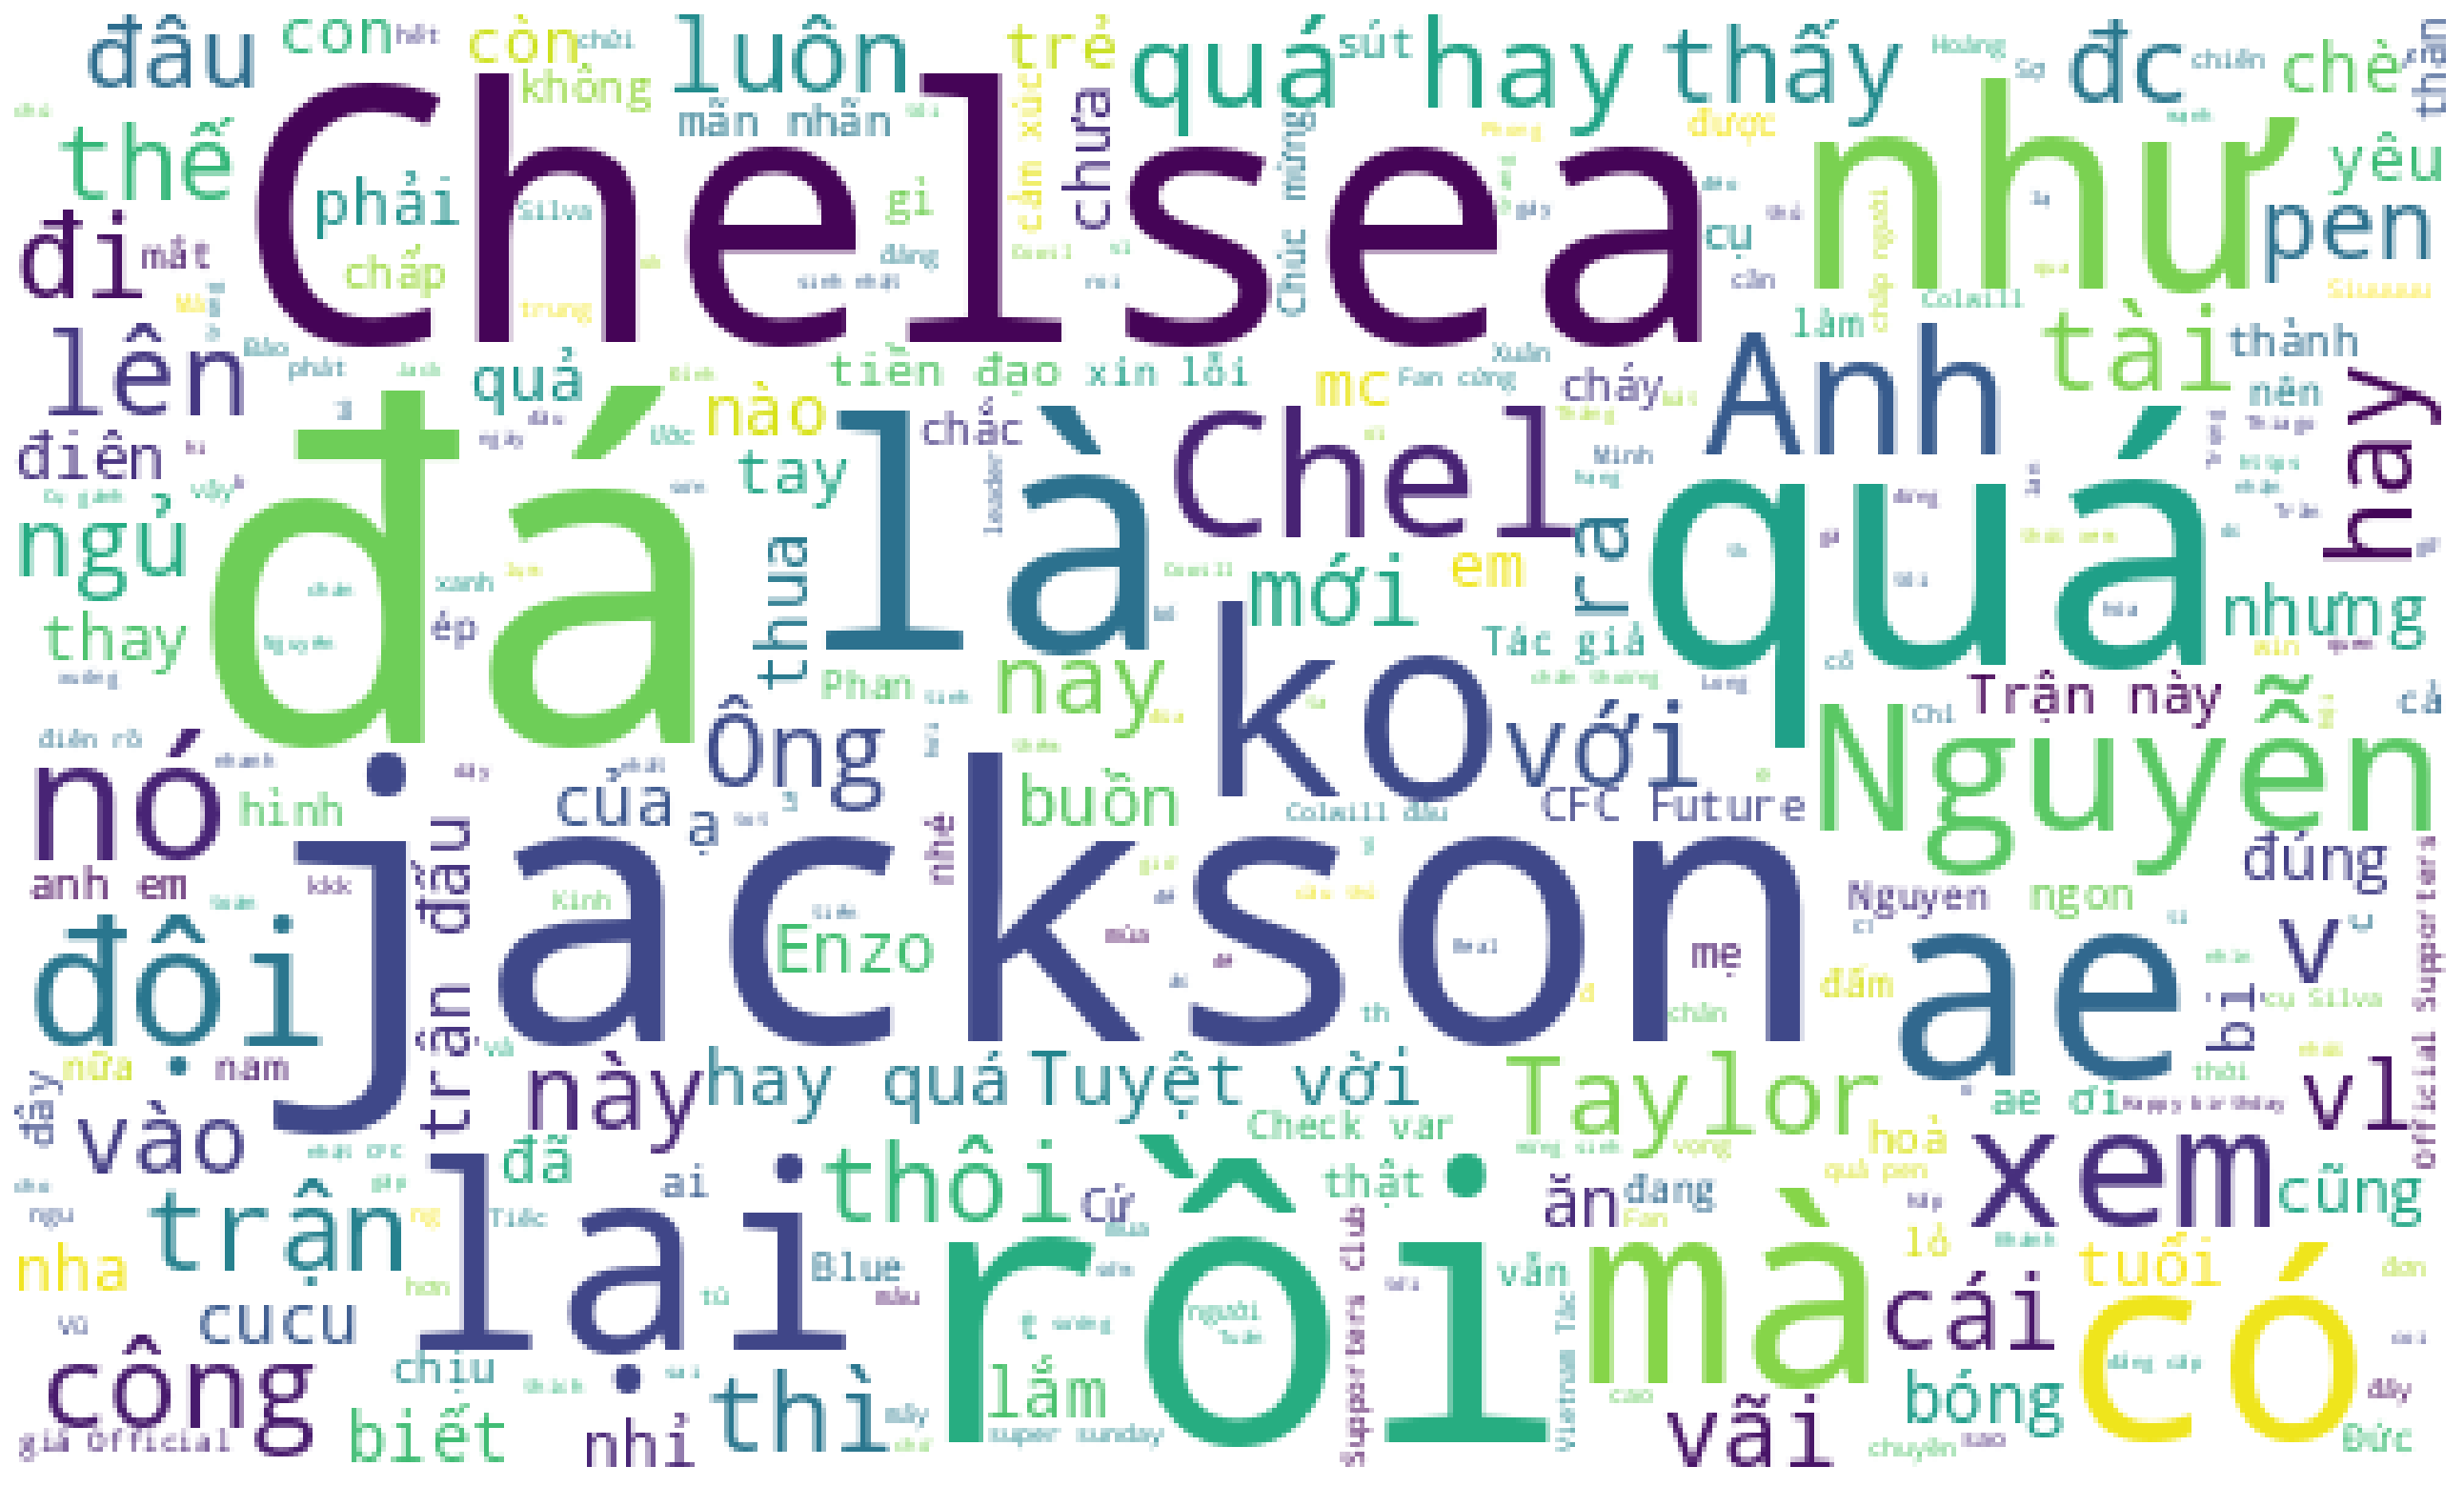

In [ ]:
#import PyPDF2
from pathlib import Path
import os
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
texto =text
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', max_words=300, width=500, height=300).generate(texto)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show

### Thuc hien phan tich do tich cuc cua binh luan

In [7]:
# Thuc hien chuyen binh luan cua nguoi dung tu tieng viet sang tieng anh de phan tich don gian hon
from googletrans import Translator
import json

In [24]:
# define a translate object
translate = Translator()
comments_translate = []
# Translate some text
for i in comments_text:
    result = translate.translate(i)
    comments_translate.append(result.text)
    print(result.text)

HAPPY BIRTHDAY
welcome back
Oily Nguyen Quoc Khanh
Full squad for you.
True leader indeed
He'll be a great coach one day.
I luv this guy
Nice
Elder thiago
Not counting Silva is the youngest: v
My uncle is very good :))) I know your hand with you
London is Blue
Forever Blues 😍😘
💙💙💙
Highlights Chelsea 2-0 Real Madrid (ngày 23/11/2022, UEFA Women's Champions League mùa 2022-23): https://
www.youtube.com/
watch?v=WyW8UXWE
Wek
Highlights Real Madrid 1-1 Chelsea (ngày 08/12/2022, UEFA Women's Champions League mùa 2022-23): https://
www.youtube.com/
watch?v=axSJlhMY
ewY
perfect
Son of Bridge 👍👍
Iu 🫶🏻💙
Early debut, ku 👍
My grandfather hurry up and save the tea goods 🥰
💙
My boys💪💪
If you fly, the injury
🙏🙏🙏🙏
Ae go to the ground.The road is still very long
Mr. Tran Hoang Vu has the future in Chelsea 😄
Can not breathe
Having bravery is not joking.
Preparing to celebrate and suddenly remembered that the old team should
Phan Anh Tam
zzzzz
Advanced ⚽️
Tks em
The title of the good match will give Jac

In [56]:
#Tinh diem
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()
positive = 0
negative = 0
neutral = 0
for text in comments_translate:
    sent = sentiment.polarity_scores(text)
    if sent['compound'] >= 0.1:
        positive += 1
    elif sent['compound'] <= -0.1:
        negative += 1
    else:
        neutral += 1
    print(sent)
print(positive)
print(negative)
print(neutral)

{'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719}
{'neg': 0.0, 'neu': 0.25, 'pos': 0.75, 'compound': 0.4588}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'compound': 0.4215}
{'neg': 0.0, 'neu': 0.594, 'pos': 0.406, 'compound': 0.6249}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4215}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.61, 'pos': 0.39, 'compound': 0.7501}
{'neg': 0.0, 'neu': 0.655, 'pos': 0.345, 'compound': 0.7003}
{'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'compound': 0.9274}
{'neg': 0.0, 'neu': 0.825, 'pos': 0.175, 'compound': 0.5267}
{'neg': 0.0, 'neu': 0.825, 'pos': 0.175, 'compound': 0.5267}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5719}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu

In [57]:
sentiment_list = {'Positive':positive, 'Negative':negative, 'Neutral':neutral}

In [58]:
sentiment_label = sentiment_list.keys()
sentiment_value = sentiment_list.values()

([<matplotlib.patches.Wedge at 0x7f248180e990>,
 [Text(0.4171479853209766, 1.017834740192459, 'Positive'),
  Text(-1.0219444161915974, 0.40697617892797505, 'Negative'),
  Text(0.010970561474583652, -1.0999452926309257, 'Neutral')],
 [Text(0.22753526472053265, 0.555182585559523, '37.6%'),
  Text(-0.5574242270135985, 0.22198700668798638, '12.7%'),
  Text(0.005983942622500173, -0.5999701596168684, '49.7%')])

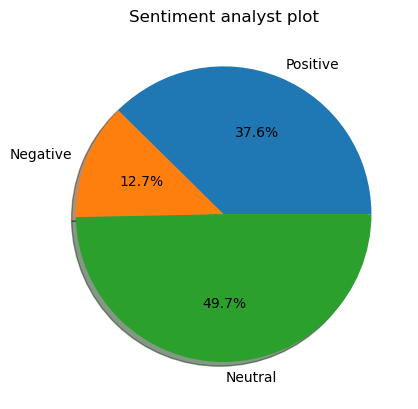

In [59]:

plt.title("Sentiment analyst plot")
plt.pie(sentiment_value, labels=sentiment_label, autopct='%1.1f%%', shadow=True)


### Du doan gioi tinh cua nguoi comment

In [3]:
clean_comment = pd.read_csv("clean_comments.csv")

In [4]:
clean_comment

Unnamed: 0        comment_id                            comment_url  \
0             0   797597649042773   https://facebook.com/797597649042773   
1             1  3535649086701574  https://facebook.com/3535649086701574   
2             2   889656838838916   https://facebook.com/889656838838916   
3             3   312327171658181   https://facebook.com/312327171658181   
4             4   993825091683095   https://facebook.com/993825091683095   
..          ...               ...                                    ...   
625         625   296816836519954   https://facebook.com/296816836519954   
626         626  3596815420566448  https://facebook.com/3596815420566448   
627         627  1160125034962467  https://facebook.com/1160125034962467   
628         628   631282592414330   https://facebook.com/631282592414330   
629         629  1215864876464068  https://facebook.com/1215864876464068   

        commenter_id                                      commenter_url  \
0    100094145080407  https://facebook.com/profile.php?id=1000941450...   
1    100005809965706  https://facebook.com/profile.php?id=1000058099...   
2    100007014553354  https://facebook.com/nem218?eav=Afai2Kg_YkgJd_...   
3    100069642623609  https://facebook.com/ChelseaFCVietnam?eav=AfZ7...   
4    100001624285032  https://facebook.com/usiomoifo.promise?eav=AfZ...   
..               ...                                                ...   
625  100003115916458  https://facebook.com/trum.tho.ne?eav=AfYmysO_N...   
626  100069642623609  https://facebook.com/ChelseaFCVietnam?eav=AfYf...   
627  100003945844189  https://facebook.com/ngoc.truong.28?eav=AfZspS...   
628  100027297457409  https://facebook.com/frankfinnjs?eav=AfamR7ybS...   
629  100002756715211  https://facebook.com/laughing311?eav=Afa01PrID...   

                                     commenter_name commenter_meta  \
0                                    Hikari Pochama            NaN   
1                             Al Ameen Abu Khadijat            NaN   
2                                     Nguyen Phuong            NaN   
3    Official Supporters Club Of Chelsea In Vietnam        Tác giả   
4                           Promise Alvin Usiomoifo            NaN   
..                                              ...            ...   
625                                       Trần Phát            NaN   
626  Official Supporters Club Of Chelsea In Vietnam        Tác giả   
627                                Trương Hồng Ngọc       Fan cứng   
628                                 Nguyễn Ngọc Hải            NaN   
629                                      Thanh Hảii            NaN   

                                          comment_text         comment_time  \
0                                       HAPPY BIRTHDAY  2023-11-04 00:00:00   
1                                         welcome back  2023-11-21 00:00:00   
2                               Nhờn Nguyễn Quốc Khánh  2023-11-23 00:00:00   
3                     Full đội hình ra sân cho anh em.                  NaN   
4                                   True leader indeed                  NaN   
..                                                 ...                  ...   
625  Ng Đức Trung k biết có phải nhét chữ k . Nhưng...  2023-11-04 00:00:00   
626  Khẩu trang sắp hết, các Fen nhanh tay inbox pa...  2023-11-04 00:00:00   
627               Túi rút + Khẩu trang giá cả ra sao ạ  2023-11-04 00:00:00   
628                               Liên Mai mua không c  2023-11-04 00:00:00   
629                                                  .  2023-11-04 00:00:00   

                                         comment_image  \
0                                                  NaN   
1                                                  NaN   
2                                                  NaN   
3    https://scontent.fhan5-11.fna.fbcdn.net/v/t39....   
4    https://scontent-hkg4-1.xx.fbcdn.net/m1/v/t6/A...   
..                                                 ..

In [5]:
commenter_name_list = clean_comment["commenter_name"].tolist()

In [6]:
#Lay ra last_name tu full_name
import re

last_name = []
for name in commenter_name_list:
    name_parts = re.findall(r'\S+', name)
    if len(name_parts) == 1:
        ten = name_parts[0]
    elif len(name_parts) >= 2:
        ten = " ".join(name_parts[-1:])
    else:
        ten = ""
    last_name.append(ten)
    print(ten)




Pochama
Khadijat
Phuong
Vietnam
Usiomoifo
Murugami
Innocent
Isa
Kuyeri
Việt
Sửu
Hiển
Hải
Vietnam
Vietnam
Tran
Chanh
Nguyễn
Bằng
Vũ
Lộc
Girum
Công
Hongloan
Hiệu
Tùng
Lo
Trần
Tòng
Tâm
Nguyen
Tran
Nguyen
Thiện
Già
Hậu
Linh
Hòa
Gỗ
Duy
Chốp
Gia
Bảy
SkinNy
Dương
Huy
Hickinson
Chamnan
Bah
Nguyễn
Hưng
Hưng
DS
Anh
Quỳnh
Nguyen
Nguyễn
Đỗ
Tran
Long
Hiếu
Giang
ແສນທະວີສຸກ
Nguyen
Phan
Vu
SG
Duy
Nguyễn
Hang
Vinh
Đặng
Lê
Truong
Hang
Đức
Đức
Long
Nam
Toàn
Ơi
Sơn
Tuyển
Tèo
Cong
Dũng
Chelsea
Trinh
Vũ
Huy
Chelsea
Hao
Nam
Hải
Điệp
Thùy
Blue
Đạt
Lê
Trần
Cường
Thịnh
Đạo
Le
Bin
Vũ
Ngựa
Phương
Quan
Vi
Lợi
Huy
Toàn
Bui
Cuber
Vu
Nghĩa
Hoàng
Tài
Phạm
Hoang
Dũng
Huy
Quân
Lợi
Lii
Sang
Huy
Lê
Mạnh
Mạnh
Nguyên
Sơn
Hoài
Phan
Hiếu
Quỳnh
Hiệp
Long
Hiếu
Thiên
Huy
Sơn
Hiều
Lê
Ơi
Công
Dien
Jensen
Huynh
Vo
Tài
Kdc
Khải
Huy
Thức
Hùng
Thắng
Thạch
Thùy
Hoài
Anh
Con
Tuấn
Van
Thi
Phat
Dương
Nhựt
SHl
Thnh
Lê
Hiếu
Thông
Pham
Trần
Tu
Tâm
My
Lê
Seven
Dương
Tùng
Bảo
Ngọc
Vũ
Thành
Minh
Huy
Trí
Mãn
Tiến
Dương
Trường
Kỳ
Trần
Nguyên
Tùng

In [7]:
#Du doan gioi tinh
import requests, json
male = 0
female = 0
unknown = 0
for name in last_name:
    content = requests.get(f"https://api.genderize.io/?name={name}").text
    gender = json.loads(content)['gender']
    if gender == 'male':
        male += 1
    elif gender == 'female':
        female += 1
    else:
        unknown += 1

In [8]:
male

499

In [9]:
female

92

In [10]:
unknown

39

In [17]:
gender_number = {'Male' : male, 'Female' : female, 'Unknown' : unknown}

In [18]:
gender_type = list(gender_number.keys())
gender_count= list(gender_number.values())

In [20]:
def addlabels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], int(y[i]), ha = 'center')

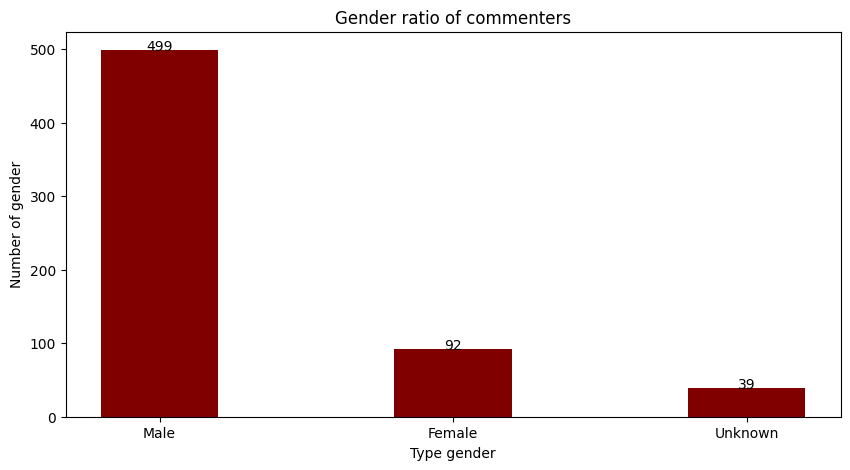

In [21]:
fig = plt.figure(figsize = (10, 5))
plt.title("Gender ratio of commenters")
plt.bar(gender_type, gender_count, color ='maroon',
        width = 0.4)
addlabels(gender_type, gender_count)
plt.xlabel("Type gender")
plt.ylabel("Number of gender")
plt.title("Gender ratio of commenters")
plt.show()

# Que quan, trinh do hoc van cua commenters

In [20]:
from facebook_scraper import get_profile

In [5]:
commenter_profile = pd.read_csv("clean_comments.csv")

In [10]:
commenter_id = commenter_profile['commenter_id'].to_list()

In [11]:
commenter_id

[100094145080407,
 100005809965706,
 100007014553354,
 100069642623609,
 100001624285032,
 100012678455536,
 100088215191450,
 100007655587900,
 100023228713507,
 100008777528805,
 100006552853944,
 100004741924641,
 100001684471530,
 100069642623609,
 100069642623609,
 61553743493354,
 100006359744596,
 100026901071596,
 100004055317500,
 100006092492166,
 100018516572594,
 100006220903384,
 100004156832707,
 100003755644382,
 100003721233481,
 100003304122636,
 100078819571573,
 100001384494128,
 100077159242717,
 100001756073563,
 100002604964166,
 100000050014687,
 100000593886745,
 100007385040875,
 100002953787040,
 100051954918232,
 100006800705824,
 100004513414116,
 100074654135358,
 100052295147543,
 1011549920,
 100000279713312,
 100003556864705,
 100004104070390,
 100010806524831,
 100036489848070,
 775187618,
 100007290732236,
 100002306189002,
 100002908411854,
 100027874720844,
 100003161025510,
 100001447876586,
 100001068877780,
 100005276972633,
 100008795105384,
 100

In [21]:
#Lay ra profile cua users
commenters_profile = []

for id in commenter_id:
    try:
        profile = get_profile(str(id))
        commenters_profile.append(profile)
        print(profile)
    except Exception as e:
        print(f"Error for user {id}: {e}")


{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'cover_photo': 'https://scontent.fhan5-2.fna.fbcdn.net/v/t39.30808-6/397258714_188166644331504_1375095186255322540_n.jpg?stp=cp0_dst-jpg_e15_q65_s320x320&_nc_cat=104&ccb=1-7&_nc_sid=ff2d77&_nc_ohc=PnqjArAV9DAAX_sT5ge&_nc_ht=scontent.fhan5-2.fna&oh=00_AfDB0s9G8jEHcvcL2P5UpWxurheiF6o6Yb1f9SctHQ2PYA&oe=65710851', 'profile_picture': 'https://scontent.fhan5-8.fna.fbcdn.net/v/t39.30808-1/372976441_151970401284462_4817204084151380104_n.jpg?stp=cp0_dst-jpg_e15_q65_s120x120&_nc_cat=108&ccb=1-7&_nc_sid=4da83f&_nc_ohc=VkTHiea1MZMAX9usszG&_nc_ht=scontent.fhan5-8.fna&oh=00_AfA9LReEXVLDsEl1x6pc19ekfzD452DIJeKkCd-dnqx_cg&oe=6571F41D', 'id': '100094145080407', 'Name': 'Hikari Pochama', 'Học vấn': 'trung hoc co so chanh lo\nTrường trung học', 'Nơi từng sống': 'Quảng Ngãi\nTỉnh/Thành phố hiện tại\nQuảng Ngãi\nQuê quán'}
{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'cover_photo': 'https://scontent.fhan5-6.f

In [25]:
#Luu lai de neu can co the su dung lai
commenters_profile2 = commenters_profile
arr = np.array(commenters_profile2)
np.save("Data/commenters_profile.npy", arr)

In [27]:
profile_df = pd.DataFrame(commenters_profile)

In [31]:
#Luu vao file csv de thuc hien lam sach
profile_df.to_csv("Data/profile_commenter.csv")

Phan tich ve noi o hien tai cua users

In [9]:
hometowm = pd.read_csv("Data_clean/clean_profile_howntown.csv")
hometowm.drop(columns="Unnamed: 0", inplace=True)

In [10]:
hometown_list = hometowm["Nơi từng sống"].to_list()

In [11]:
province_dict = {}

for data_string in hometown_list:
    # Tách chuỗi thành danh sách dựa trên dấu xuống dòng
    data_list = data_string.split('\n')

    # Lấy thông tin tỉnh và quê quán

    hometown_str = "Unknown"  
    province = "Unknown" 
    if len(data_list) != 0:
        province = data_list[0]  
    if len(data_list) > 2:
        hometown_str = data_list[2]   

    # Đếm số lượng cho từng tỉnh
    if province in province_dict:
        province_dict[province] += 1
    else:
        province_dict[province] = 1

    print("Tỉnh/Thành phố hiện tại:", province, ", Quê quán:", hometown_str)
sorted_province_dict = dict(sorted(province_dict.items(), key=lambda item: item[1], reverse=True))

    

Tỉnh/Thành phố hiện tại: Quảng Ngãi , Quê quán: Quảng Ngãi
Tỉnh/Thành phố hiện tại: Kaduna , Quê quán: Kaduna
Tỉnh/Thành phố hiện tại: Abuja , Quê quán: Enugu
Tỉnh/Thành phố hiện tại: Abuja , Quê quán: Unknown
Tỉnh/Thành phố hiện tại: Harare , Quê quán: Kotwa
Tỉnh/Thành phố hiện tại: Hà Nội , Quê quán: Jeju Island, South Korea 1100
Tỉnh/Thành phố hiện tại: Thành phố Hồ Chí Minh , Quê quán: Quảng Ngãi
Tỉnh/Thành phố hiện tại: Thành phố Hồ Chí Minh , Quê quán: Unknown
Tỉnh/Thành phố hiện tại: Thành phố Hồ Chí Minh , Quê quán: Hưng Yên
Tỉnh/Thành phố hiện tại: Vĩnh Yên , Quê quán: Tho Tang, Ha Noi, Vietnam
Tỉnh/Thành phố hiện tại: Lạng Sơn , Quê quán: Hà Nội
Tỉnh/Thành phố hiện tại: Hà Nội , Quê quán: Thọ Xuân (huyện)
Tỉnh/Thành phố hiện tại: Quảng Ngãi , Quê quán: Unknown
Tỉnh/Thành phố hiện tại: Xa Vung Tau, Bà Rịa-Vũng Tàu, Vietnam , Quê quán: Quảng Ngãi
Tỉnh/Thành phố hiện tại: Hà Nội , Quê quán: Nam Định
Tỉnh/Thành phố hiện tại: Đà Nẵng , Quê quán: Hòa Xuân (1), Quang Nam-Da Nang, Vi

In [12]:
province_keys = list(sorted_province_dict.keys())[:50] #Do so luong qua lon nen chi hien thi mot phan len bieu do
province_counts = list(sorted_province_dict.values())[:50]

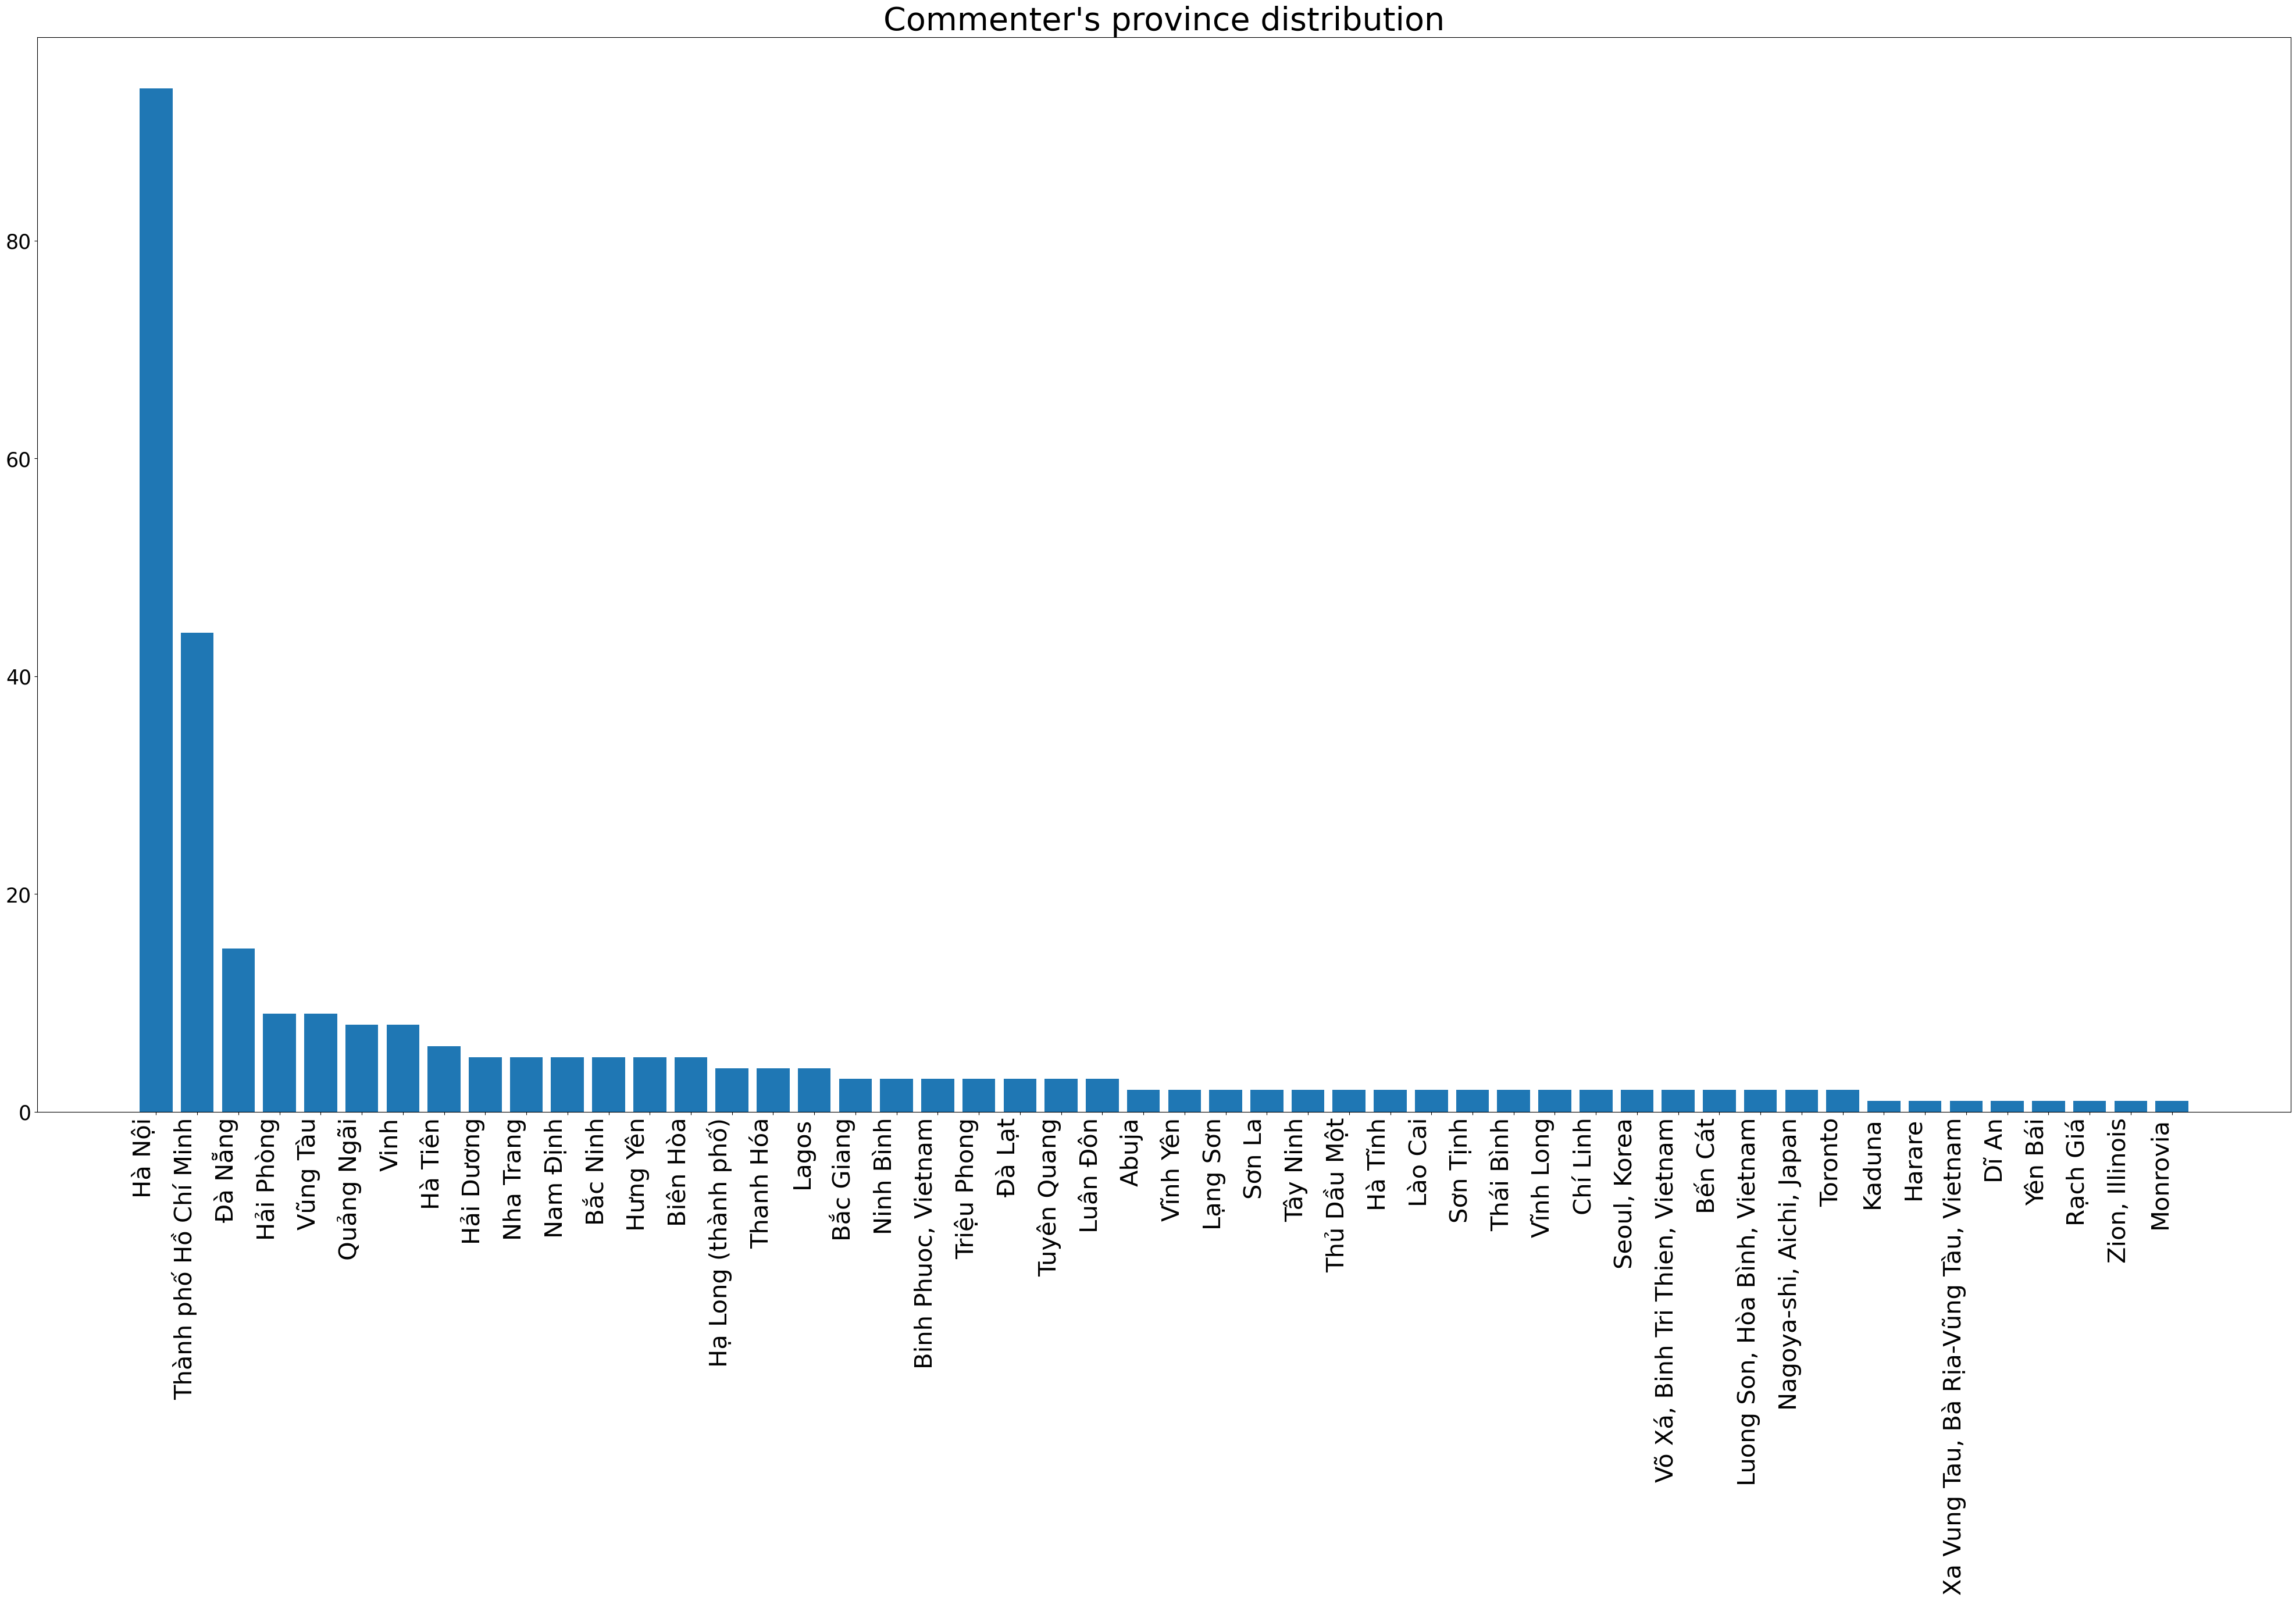

In [13]:
plt.figure(figsize=(50, 24))
plt.bar(province_keys, province_counts)
plt.xticks(np.arange(50),rotation=90, ha='right', fontsize=30)
plt.yticks(fontsize=25)
plt.title("Commenter's province distribution",fontsize=40)
plt.show()


Phan tich ve trinh do hoc van cua users

In [4]:
edu_level = pd.read_csv("Data_clean/clean_profile_edu_level.csv")
edu_level.drop(columns="Unnamed: 0", inplace=True)
edu_level

Học vấn
0           trung hoc co so chanh lo\nTrường trung học
1    KADUNA STATE UNIVERSITY STUDENTS\nCao đẳng/Đại...
2    ISU SECONDARY SCHOOL, ONICHA LGA EBONYI STATE\...
3    olumo high school\nTrường trung học\n2010 - Hi...
4    Kotwa high school\nTrường trung học\n2006 - Hi...
..                                                 ...
240  Ho Chi Minh City Open University\nCao đẳng/Đại...
241  ĐẠI HỌC BÁCH KHOA ĐÀ NẴNG\nCao đẳng/Đại học\nT...
242  National Academy of Public Administration\nQuả...
243  HIU - Đại học Quốc tế Hồng Bàng\nClinicalPharm...
244  Cao đẳng FPT Polytechnic\nPublic Relation (PR)...

[245 rows x 1 columns]

In [5]:
edu_level_list = edu_level['Học vấn'].to_list()


In [7]:
edu_level_list

['trung hoc co so chanh lo\nTrường trung học',
 'KADUNA STATE UNIVERSITY STUDENTS\nCao đẳng/Đại học\nKaduna Capital School\nTrường trung học',
 'ISU SECONDARY SCHOOL, ONICHA LGA EBONYI STATE\nTrường trung học',
 'olumo high school\nTrường trung học\n2010 - Hiện tại\nSSCE@OLUMO HIGH SCHOOL SABO ABK.SSCE in Arabic and Islamic studies@Subulu Salam Arabic&Islamic training Center,FIRST DEGREE HOLDER@faderal University of Benin COTONU,Dealing on Computer Repair&Service',
 'Kotwa high school\nTrường trung học\n2006 - Hiện tại',
 'Harvard-Westlake School\nTrường trung học\nTốt nghiệp năm 2015',
 'Trường CĐ Giao Thông Vận Tải TP.HCM\nCao đẳng/Đại học\nTrường THPT số 1 Đức Phổ\nTrường trung học\nTốt nghiệp năm 2014',
 'Đại Học Chữ To\nCao đẳng/Đại học',
 'Trung Học Phổ Thông Lam Kinh\nTrường trung học',
 'Trường Đại Học Bách Khoa-Đại Học Đà Nẵng\n- Ngành Công Nghệ Chế Tạo Máy',
 'Hayole Educatiom Furra Model Acadamy\nCao học\nTốt nghiệp năm 2016\npreparatory\nYirgalem Medical college\nCao đẳng/Đ

In [15]:
#Thuc hien tinh toan so luong moi trinh do hoc van
edu_level_dict = {}
for res in edu_level_list:
    data_list = res.split("\n")
    edu = data_list[1]
    if edu in edu_level_dict:
        edu_level_dict[edu] += 1
    else :
        edu_level_dict[edu] = 1
    print(edu)
sorted_edu_level_dict = dict(sorted(edu_level_dict.items(), key=lambda item: item[1], reverse=True))

Trường trung học
Cao đẳng/Đại học
Trường trung học
Trường trung học
Trường trung học
Trường trung học
Cao đẳng/Đại học
Cao đẳng/Đại học
Trường trung học
- Ngành Công Nghệ Chế Tạo Máy
Cao học
Cao đẳng/Đại học
Cao đẳng/Đại học
Cao đẳng/Đại học
Kỹ sư nghành Kỹ thuật điện công nghiệp
Cao đẳng/Đại học
Cao đẳng/Đại học
Trường trung học
Cao đẳng/Đại học
Cao đẳng/Đại học
Cao đẳng/Đại học
Cao đẳng/Đại học
Art, Craft & Design
Biology and Chemistry
Cao đẳng/Đại học
télécommunication et réseau informatique
Trường trung học
Cao đẳng/Đại học
日本語学
Trường trung học
Cao đẳng/Đại học
Cao đẳng/Đại học
Cao đẳng/Đại học
Quản trị kinh doanh
Cao đẳng/Đại học
Cao đẳng/Đại học
Trường trung học
Cao đẳng/Đại học
Trường trung học
Cao đẳng/Đại học
Cao đẳng/Đại học
Trường trung học
Trường trung học
Cao đẳng/Đại học
Cao đẳng/Đại học
Trường trung học
Cao đẳng/Đại học
Cao đẳng/Đại học
Cao đẳng/Đại học
Trường trung học
Cao đẳng/Đại học
Cao đẳng/Đại học
Cosmetic Tattooing
Ngôn ngữ Anh
Trường trung học
Cao đẳng/Đại học
B

In [19]:
sorted_edu_level_dict

{'Cao đẳng/Đại học': 132,
 'Trường trung học': 65,
 'Cao học': 4,
 'Quản trị kinh doanh': 2,
 'Bác sĩ Đa Khoa': 2,
 'Y Khoa (Bác Sĩ Y Khoa) 👨\u200d⚕️🩺 - General Doctor': 2,
 '- Ngành Công Nghệ Chế Tạo Máy': 1,
 'Kỹ sư nghành Kỹ thuật điện công nghiệp': 1,
 'Art, Craft & Design': 1,
 'Biology and Chemistry': 1,
 'télécommunication et réseau informatique': 1,
 '日本語学': 1,
 'Cosmetic Tattooing': 1,
 'Ngôn ngữ Anh': 1,
 'Khoan là thủng': 1,
 'Management of Information Systems': 1,
 'điện công nghiêp': 1,
 'Khoa Du Lịch-Chuyên Nghành Quản Trị Khách Sạn': 1,
 'Nursing practice': 1,
 'công nghệ thông tin(IT)': 1,
 'Marketing': 1,
 'Công Nghệ Thực Phẩm': 1,
 'Xăng dầu': 1,
 'Lang thang chém gió': 1,
 'Ngành quản trị tài chính': 1,
 'Công Nghệ Thông Tin': 1,
 'Y đa khoa': 1,
 'Kiến Trúc Sư': 1,
 'Kiến trúc': 1,
 'Điều dưỡng': 1,
 'X_Quang': 1,
 'Răng-Hàm-Mặt (RHM)': 1,
 'kinh tế xây dựng chuyên ngành': 1,
 'Ăn và Chơi': 1,
 'Economic law': 1,
 'Học Chuyên Ngành Sư phạm Tiếng Anh-(English Lang

In [22]:
edu_level_keys = list(sorted_edu_level_dict.keys()) 
edu_level_counts = list(sorted_edu_level_dict.values())

/home/dungtk2004/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128104 (\N{MAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/dungtk2004/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129658 (\N{STETHOSCOPE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/dungtk2004/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/dungtk2004/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/dungtk2004/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 35486 (\N{CJK UNIFIED IDEOGRAPH-8A9E}) missing from current font.
  fig.canvas.print

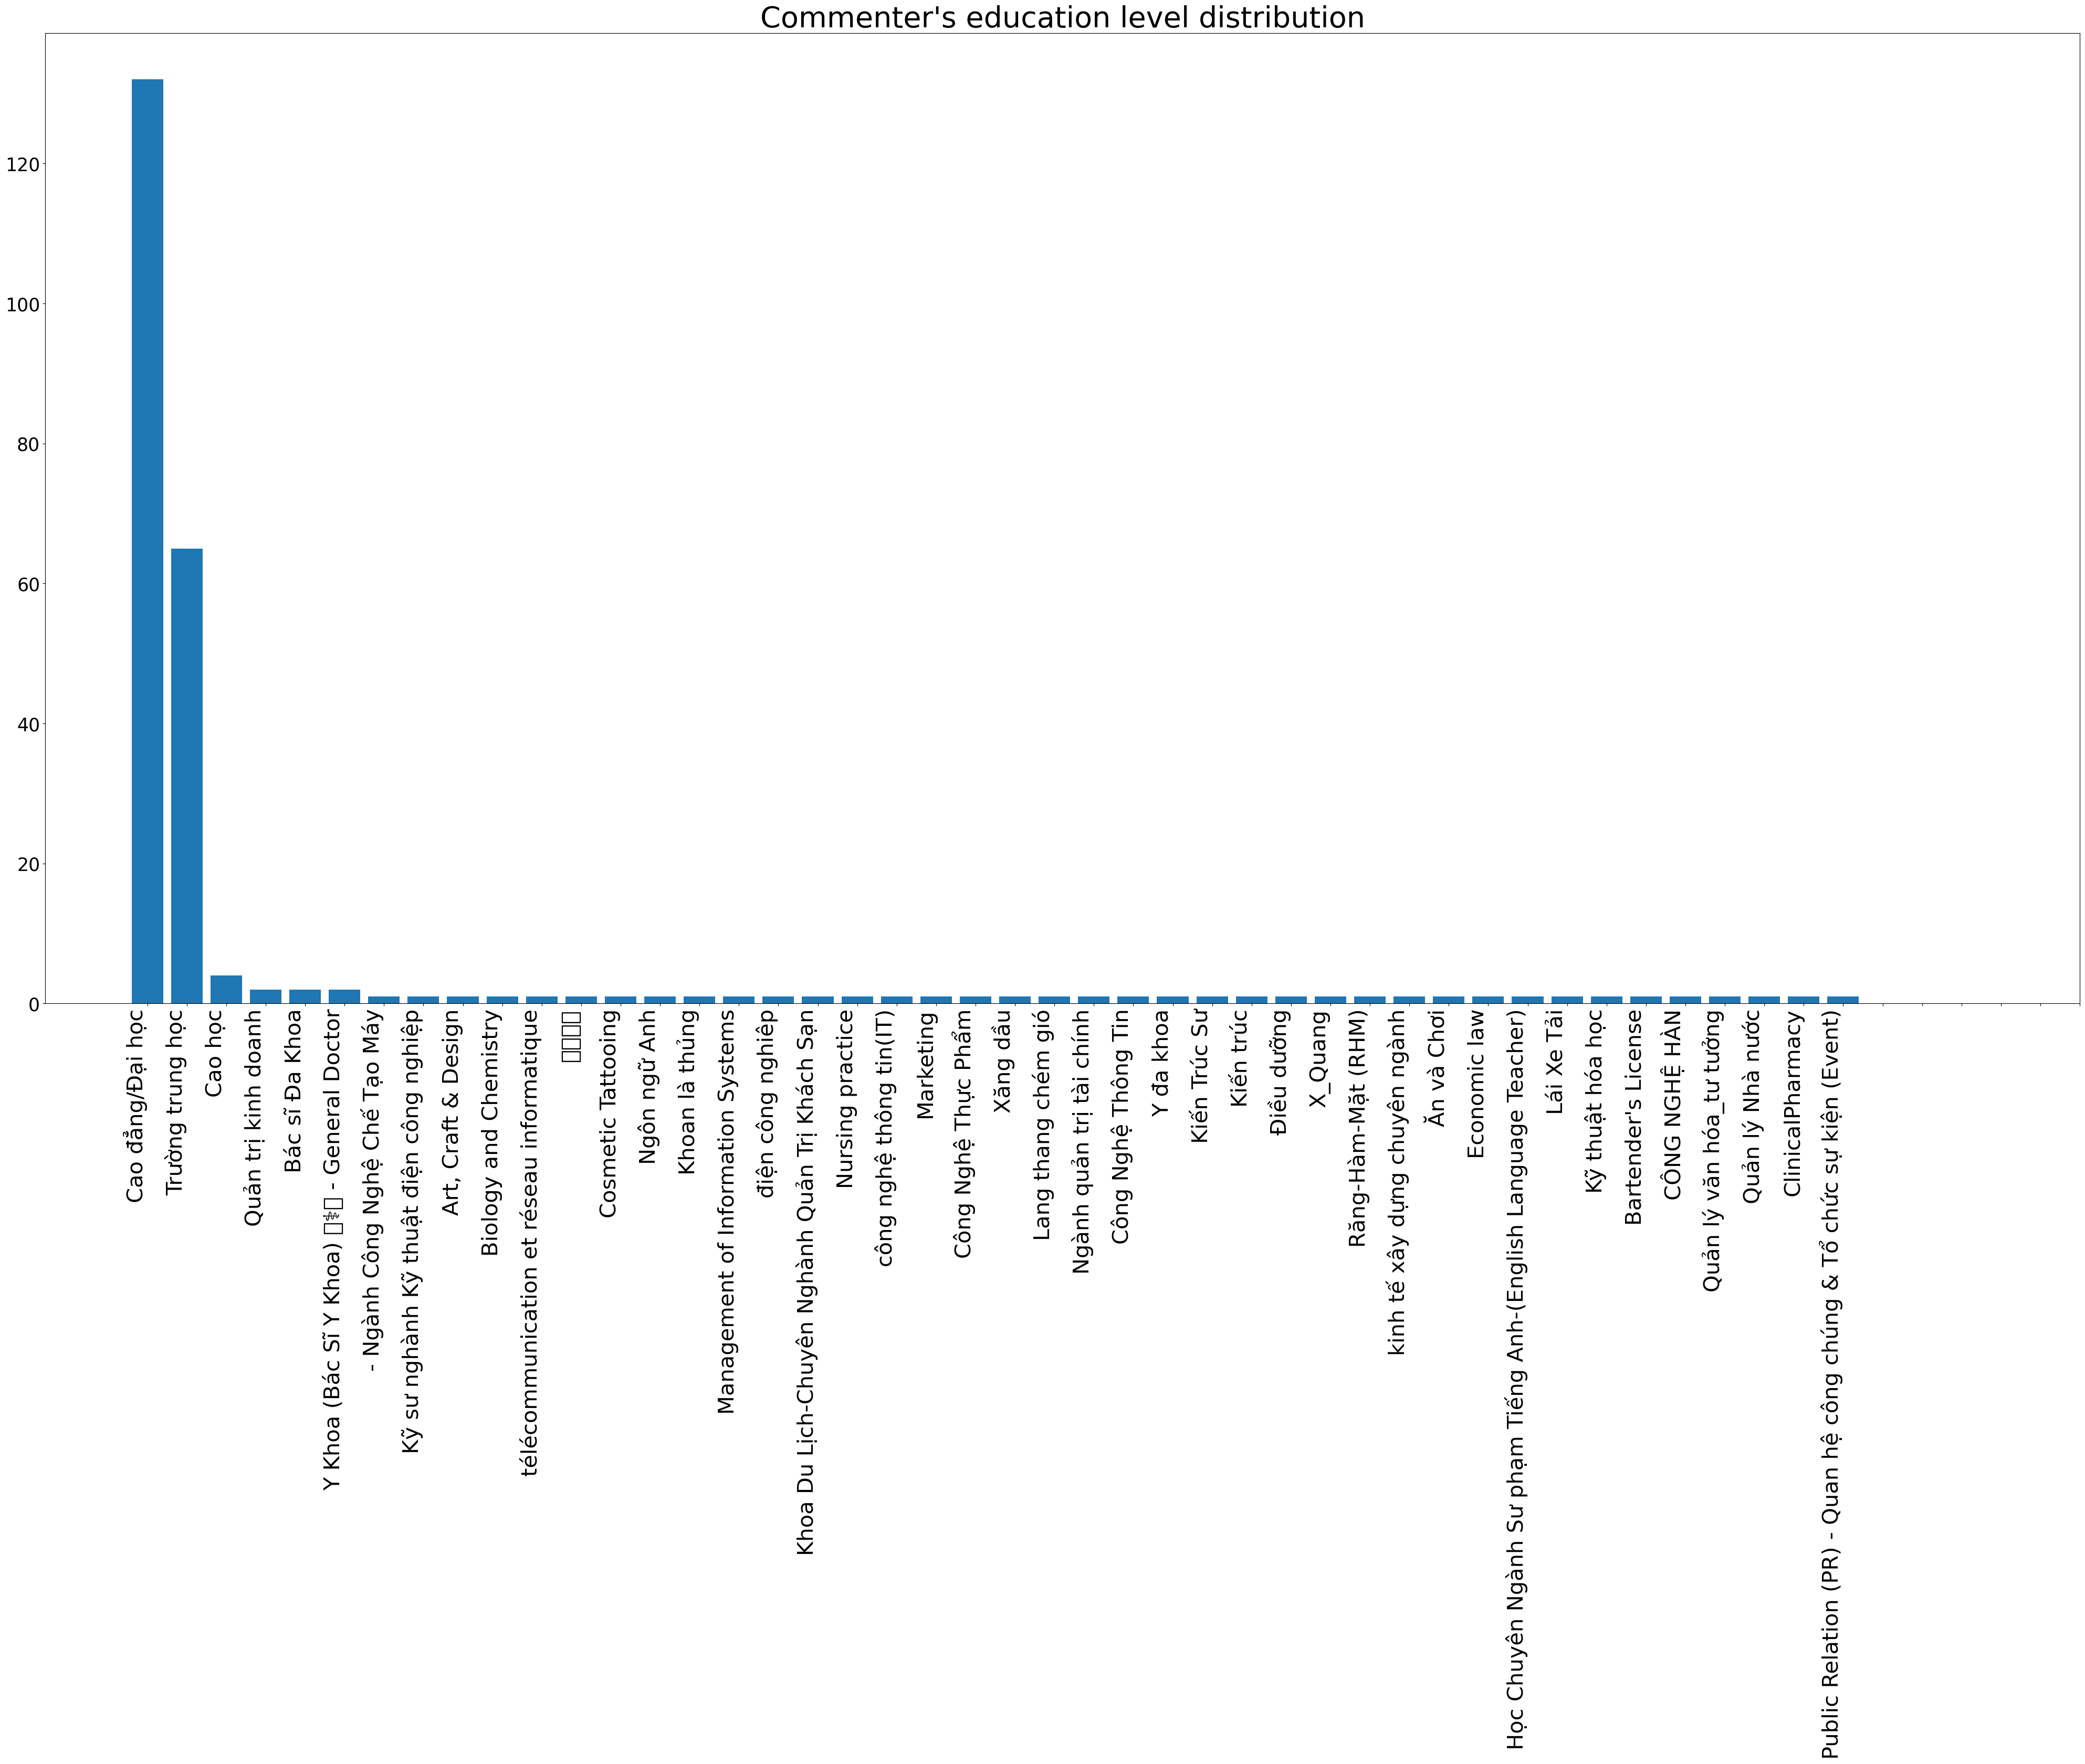

In [23]:
plt.figure(figsize=(50, 24))
plt.bar(edu_level_keys, edu_level_counts)
plt.xticks(np.arange(50),rotation=90, ha='right', fontsize=30)
plt.yticks(fontsize=25)
plt.title("Commenter's education level distribution",fontsize=40)
plt.show()